In [1]:
# import pySIMsalabim as sim
import os, uuid, copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap, LogNorm, Normalize
import pandas as pd
from joblib import Parallel, delayed

# import the SCLC_utils
from SCLC_utils import *
from SCLC_utils.hysteresis import *
cwd = os.getcwd()

# set the default parameters for the plots
plt.rc('font', size = 30)
plt.rc('axes', linewidth=2, titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', top=True, bottom=True, direction='in')
plt.rc('ytick', left=True, right=True, direction='in') 
plt.rc('figure', titlesize=5)
plt.rc('legend', fontsize=28)
plt.rc('lines', linewidth=2)

# create the folder for the results
if not os.path.exists('results'):
    os.makedirs('results')

# Vary traps

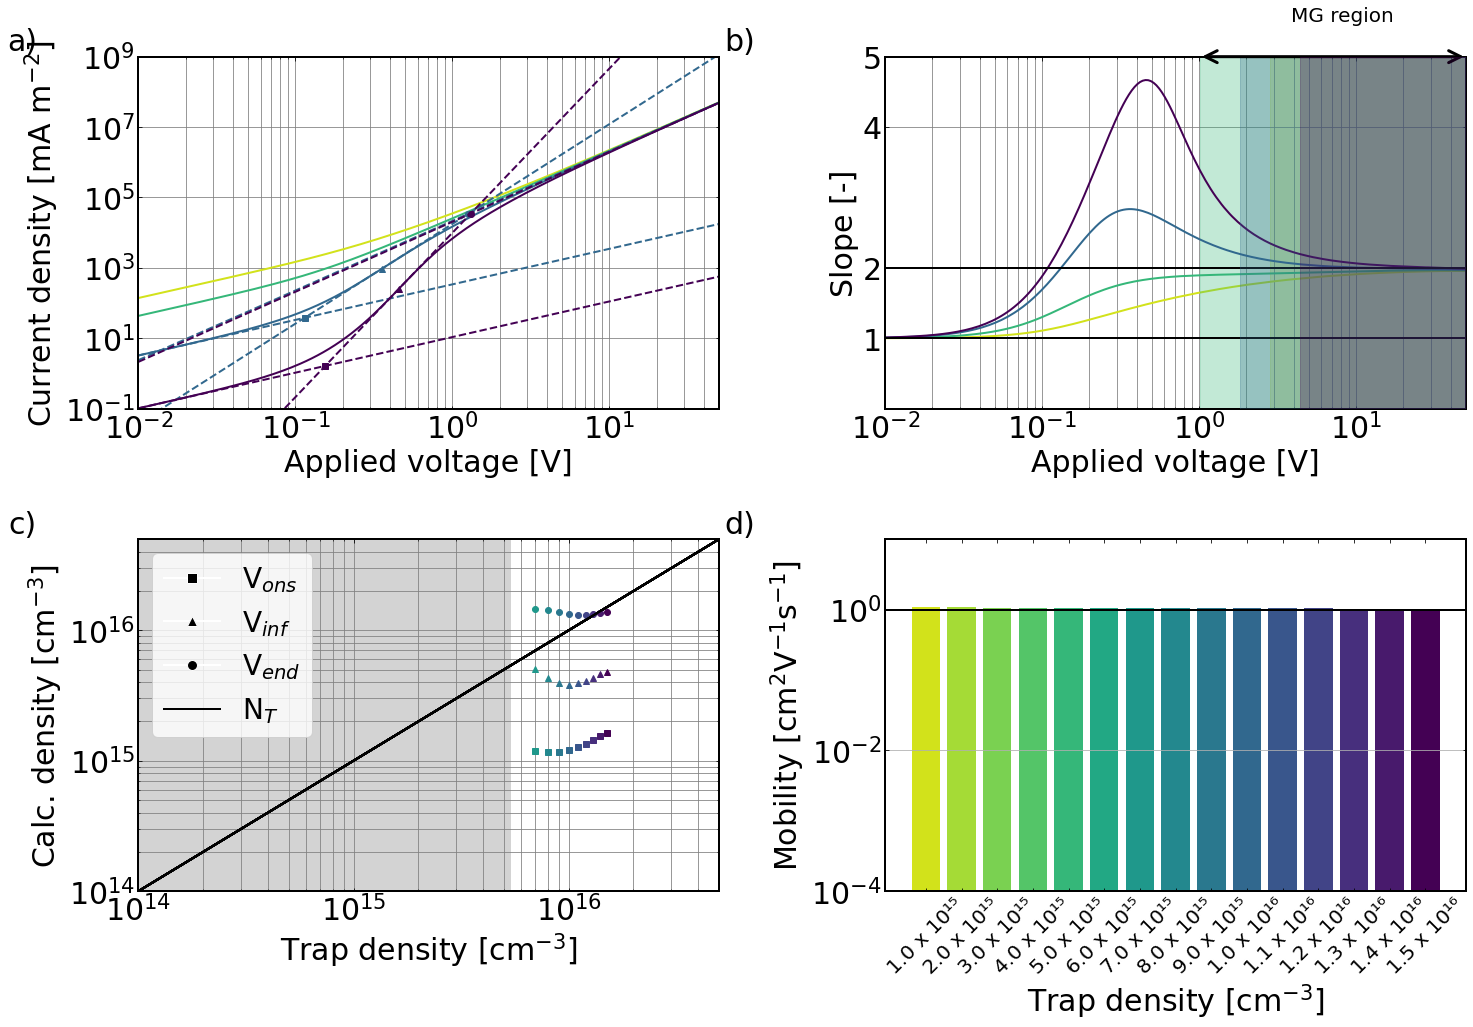

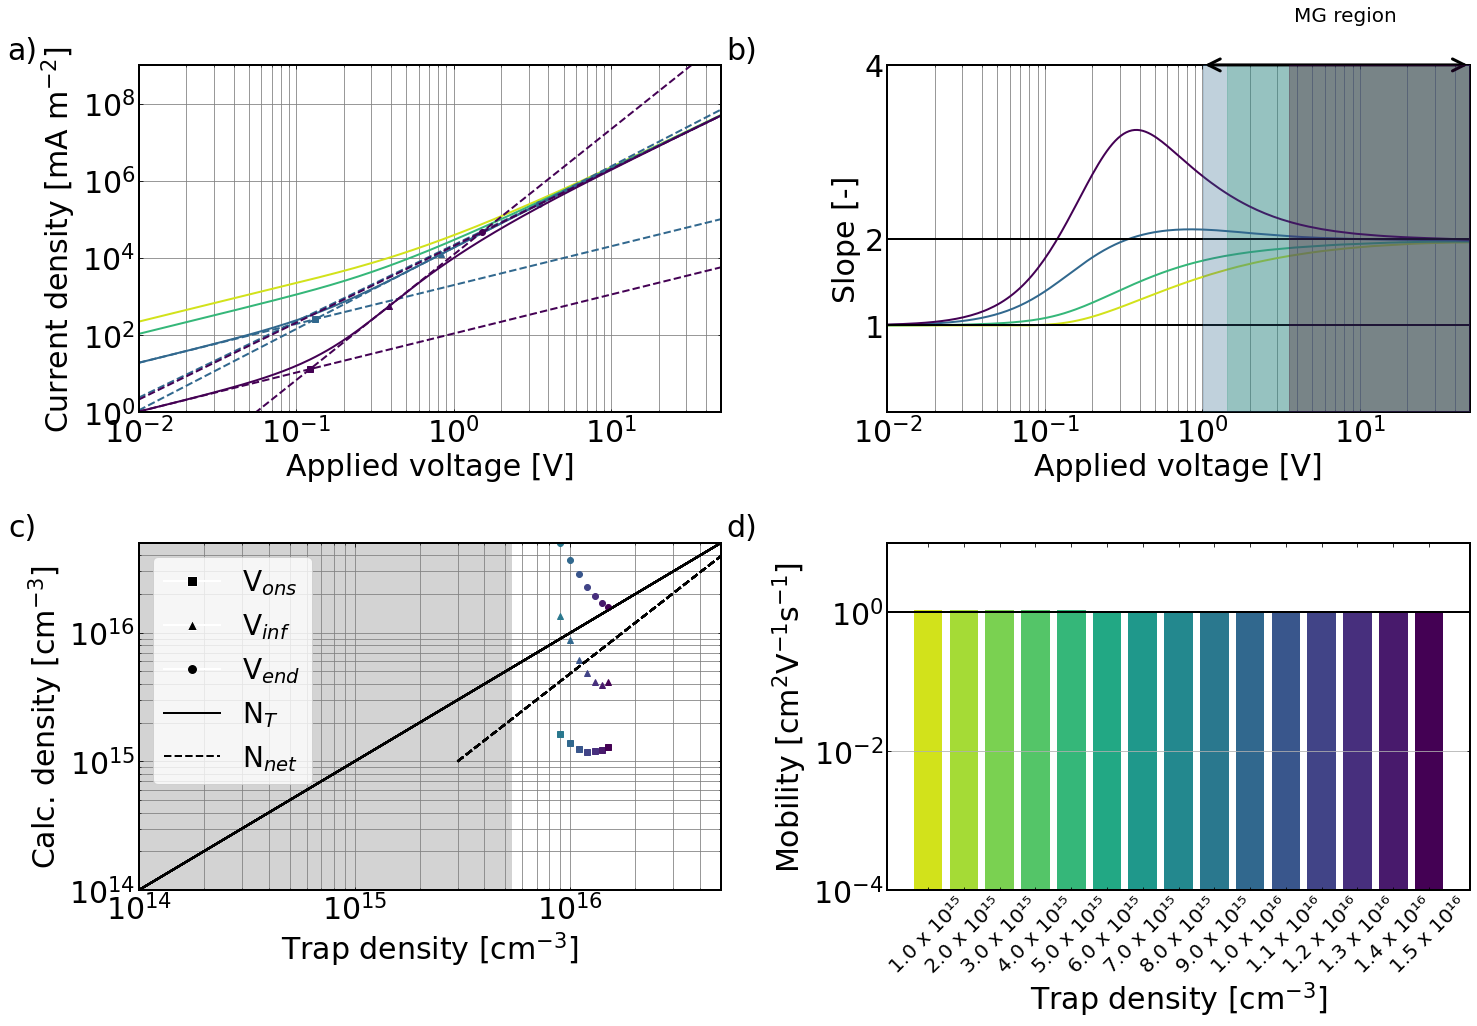

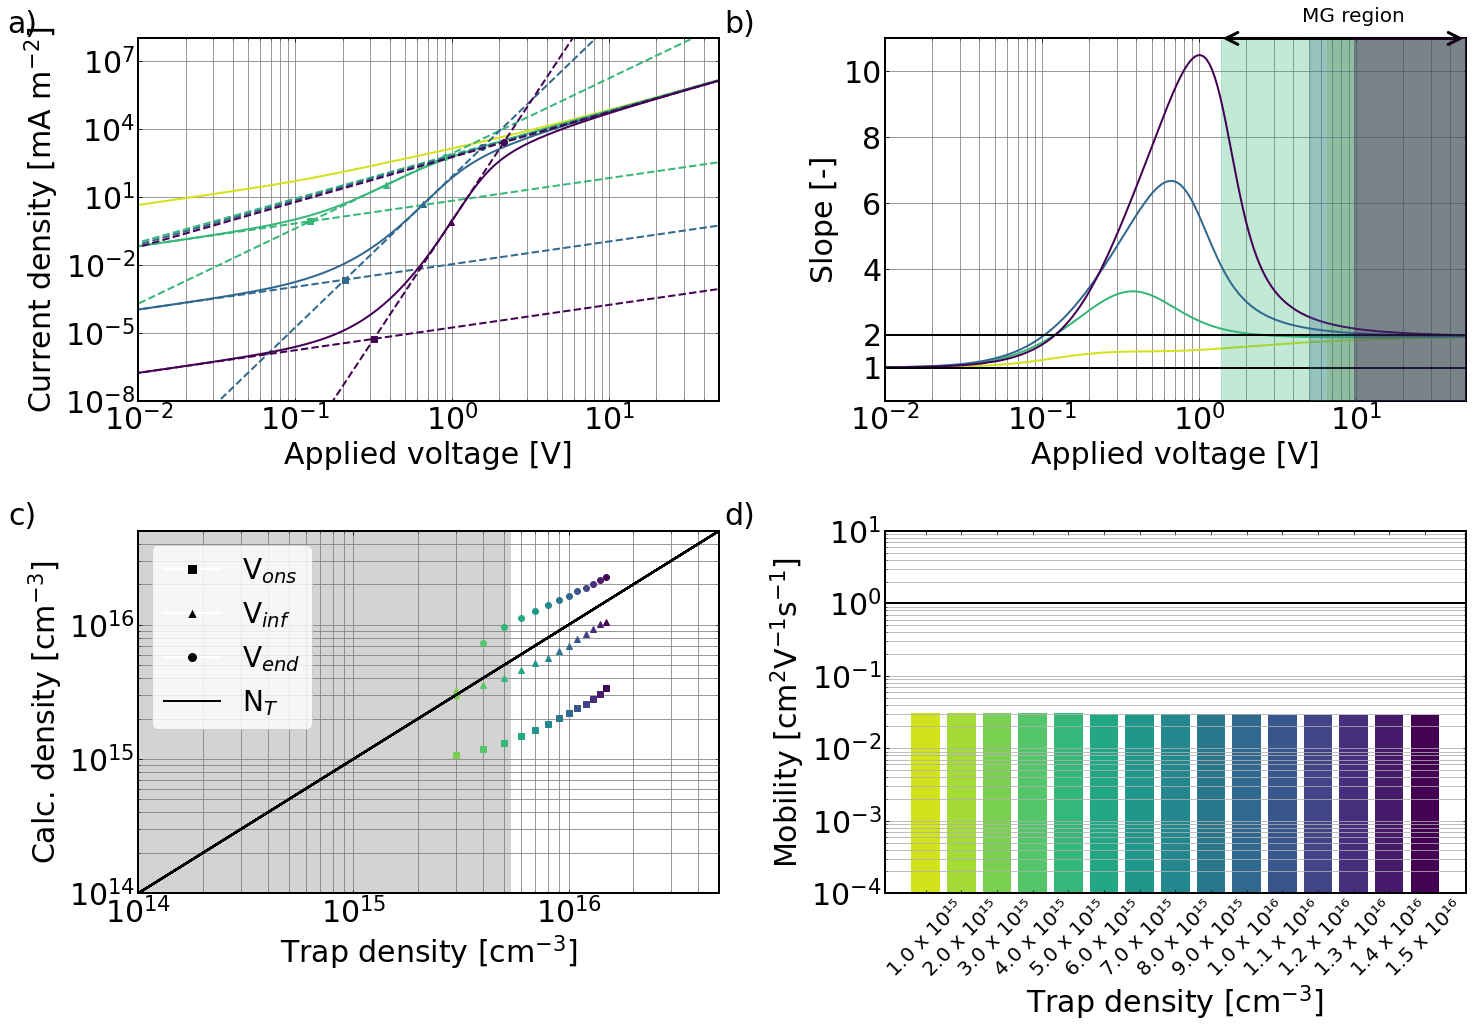

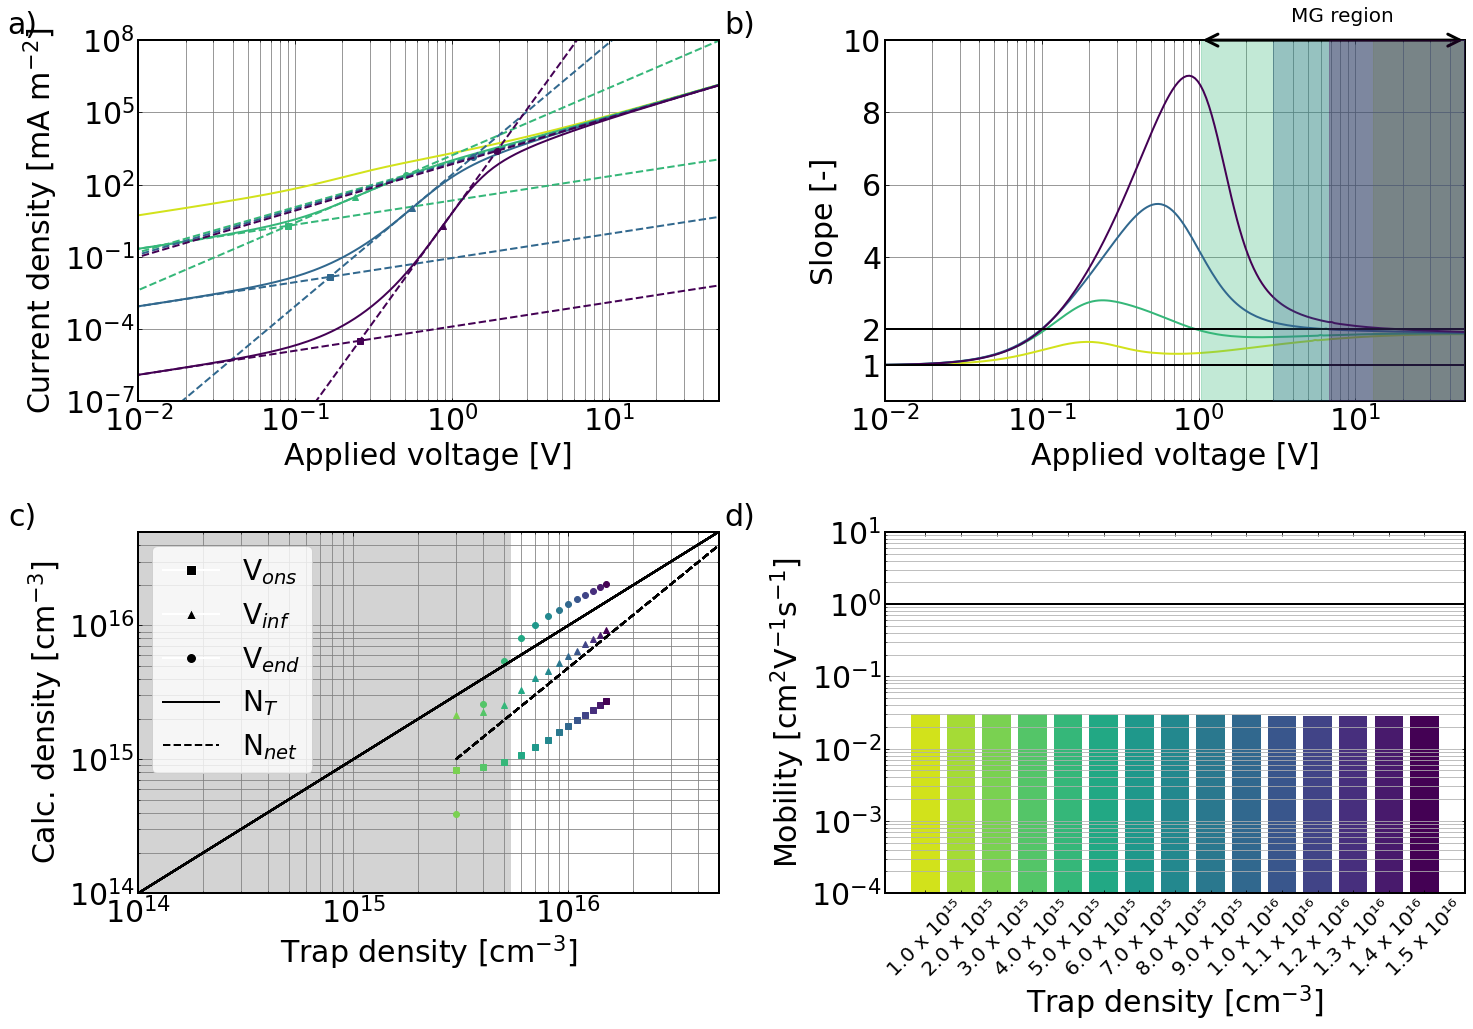

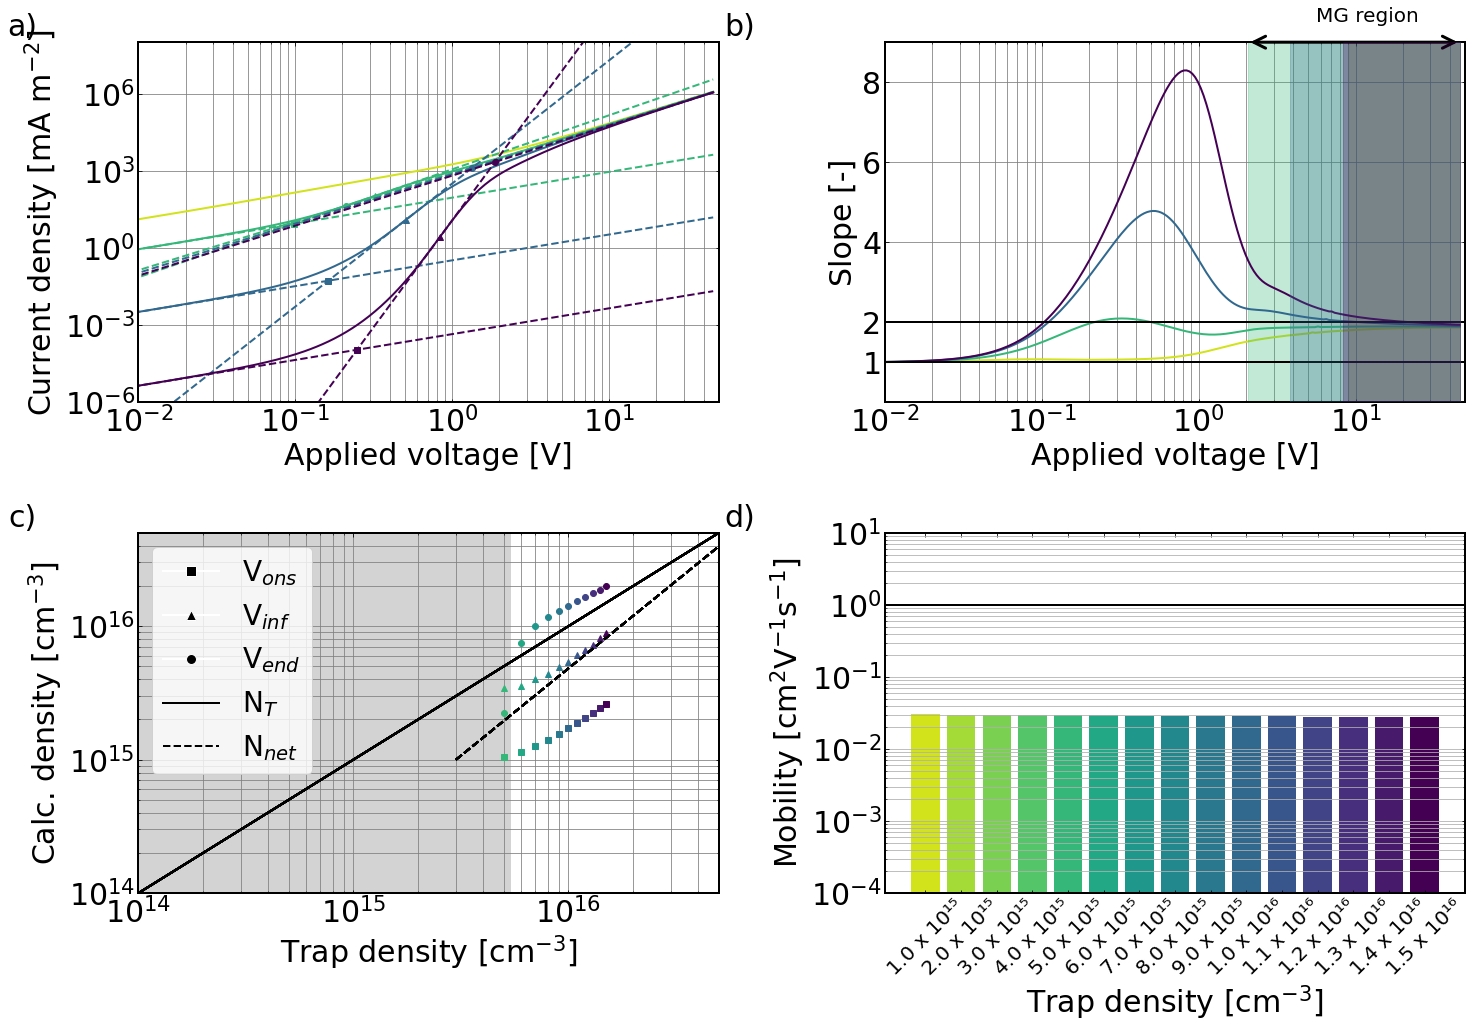

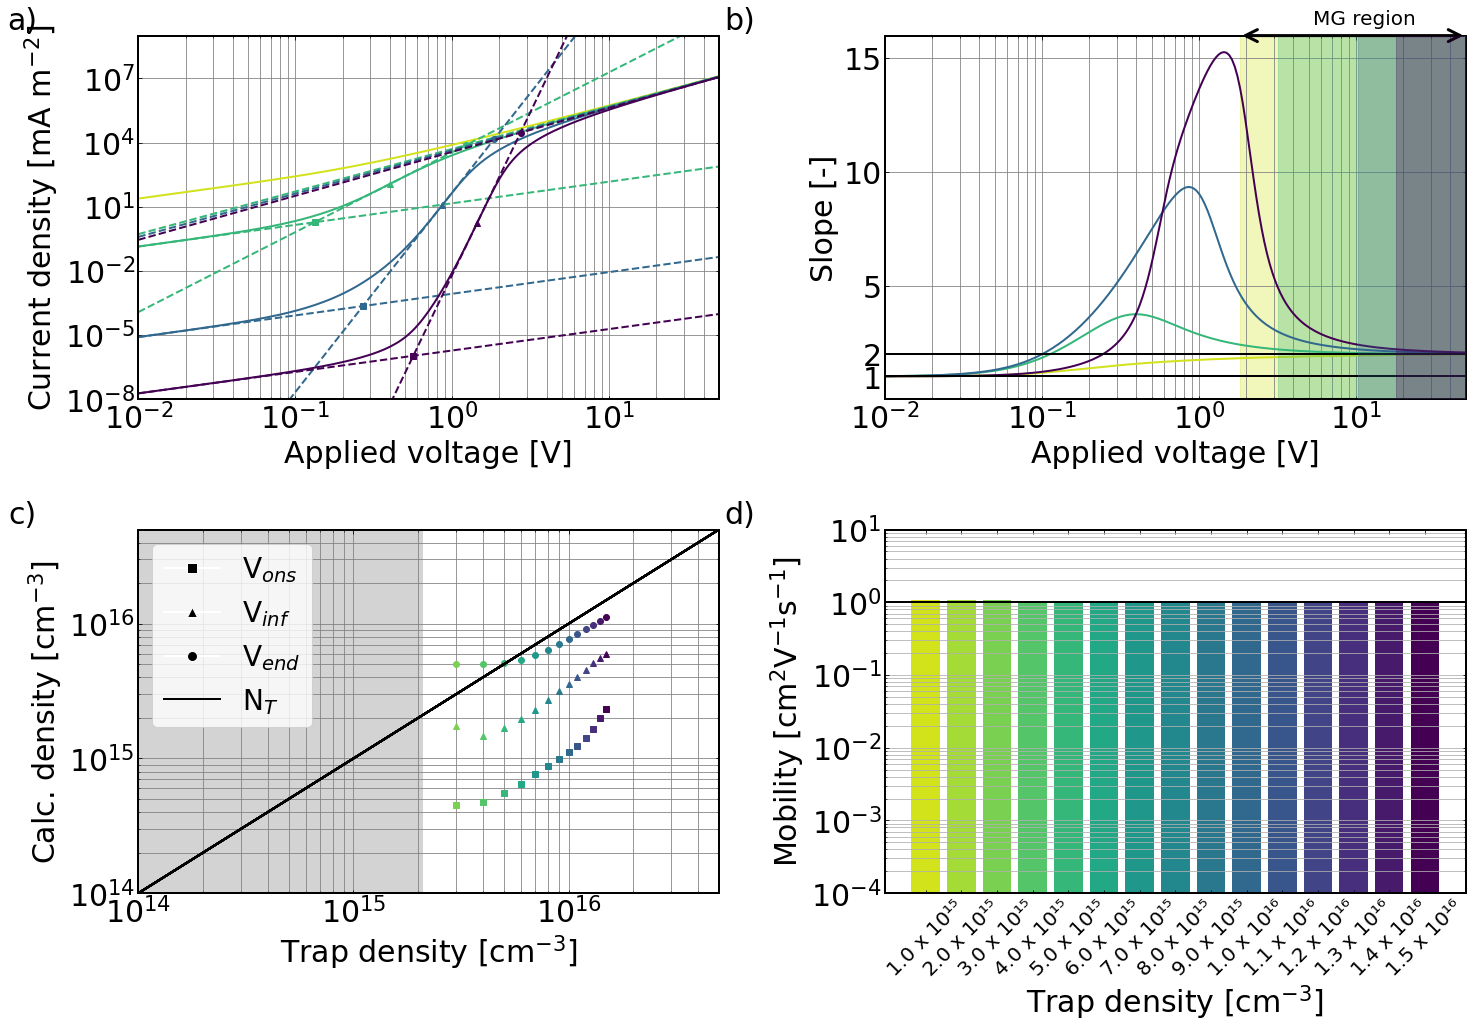

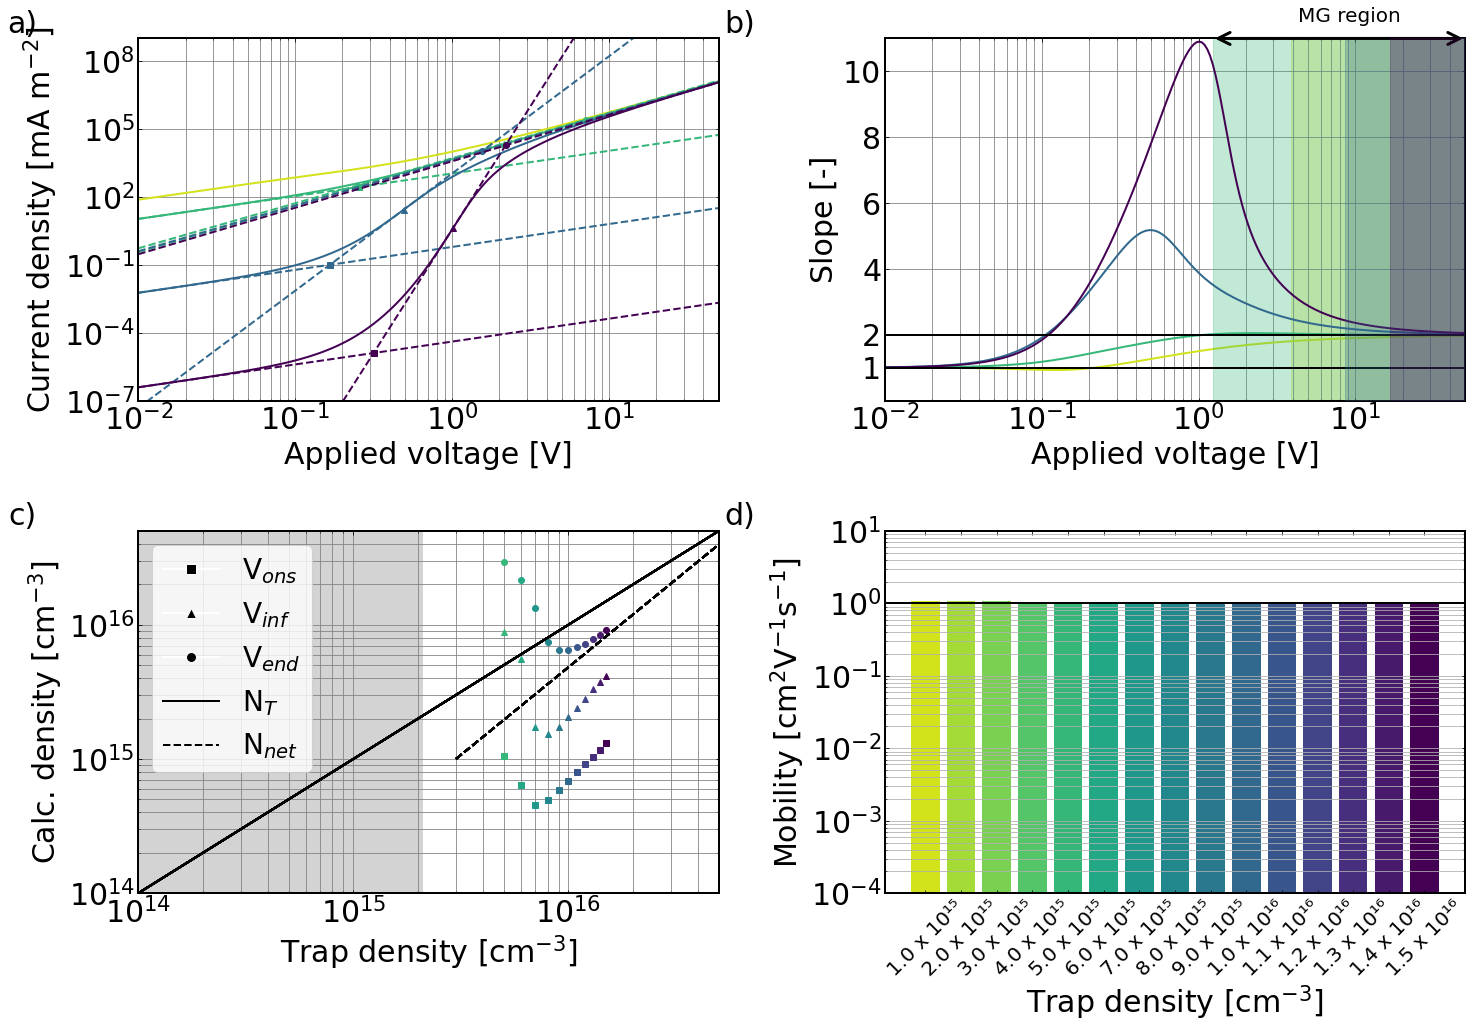

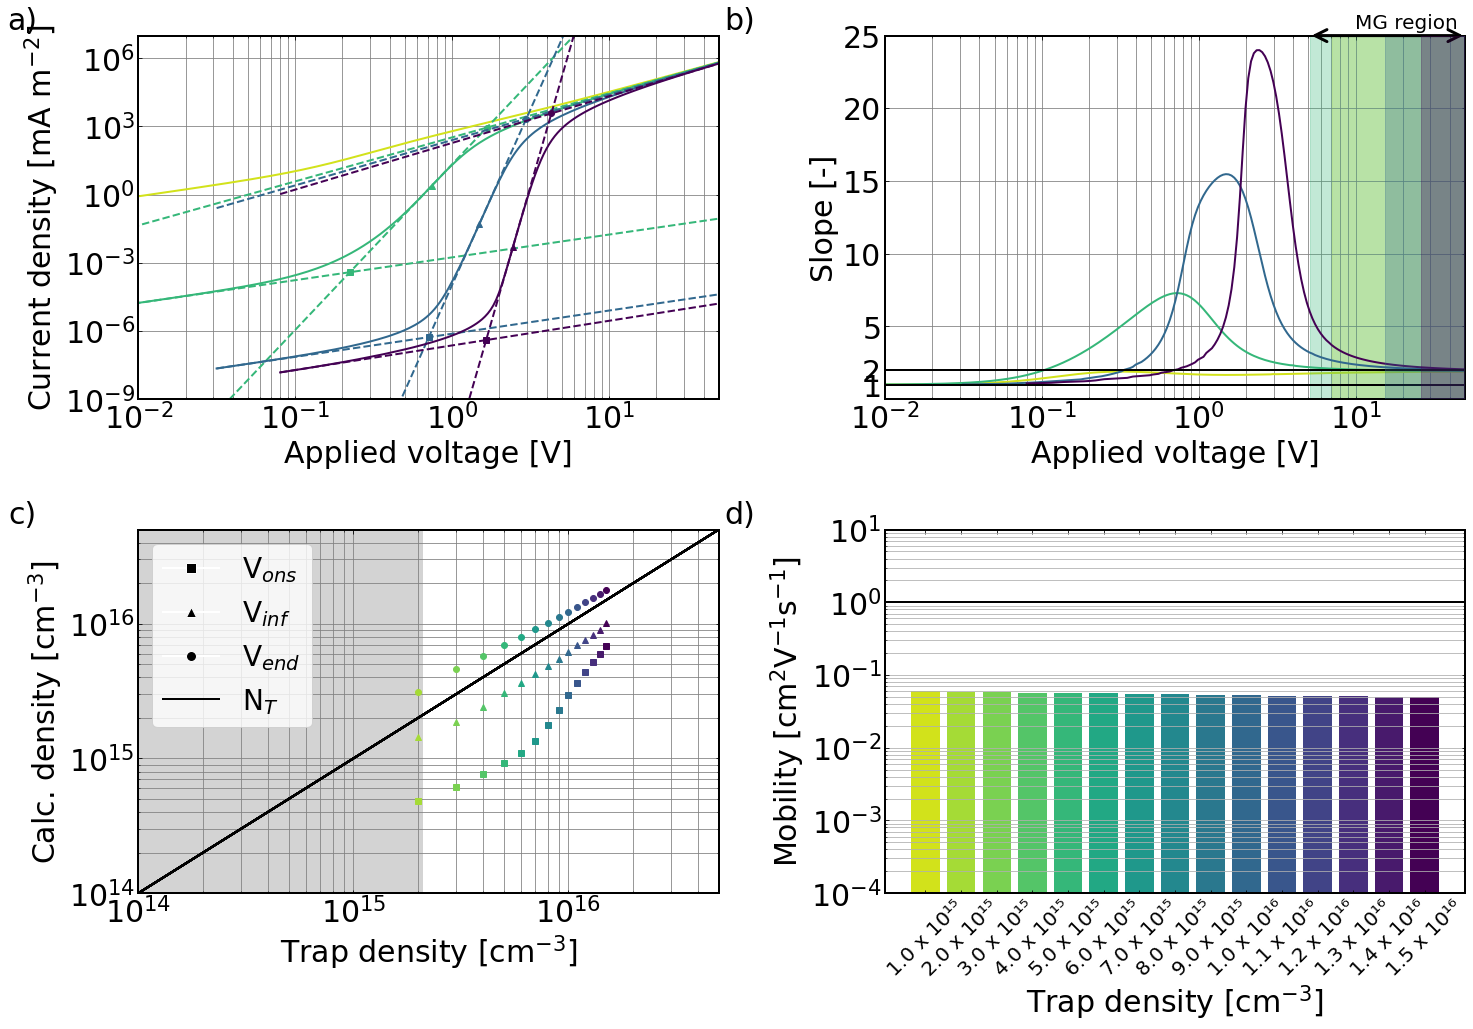

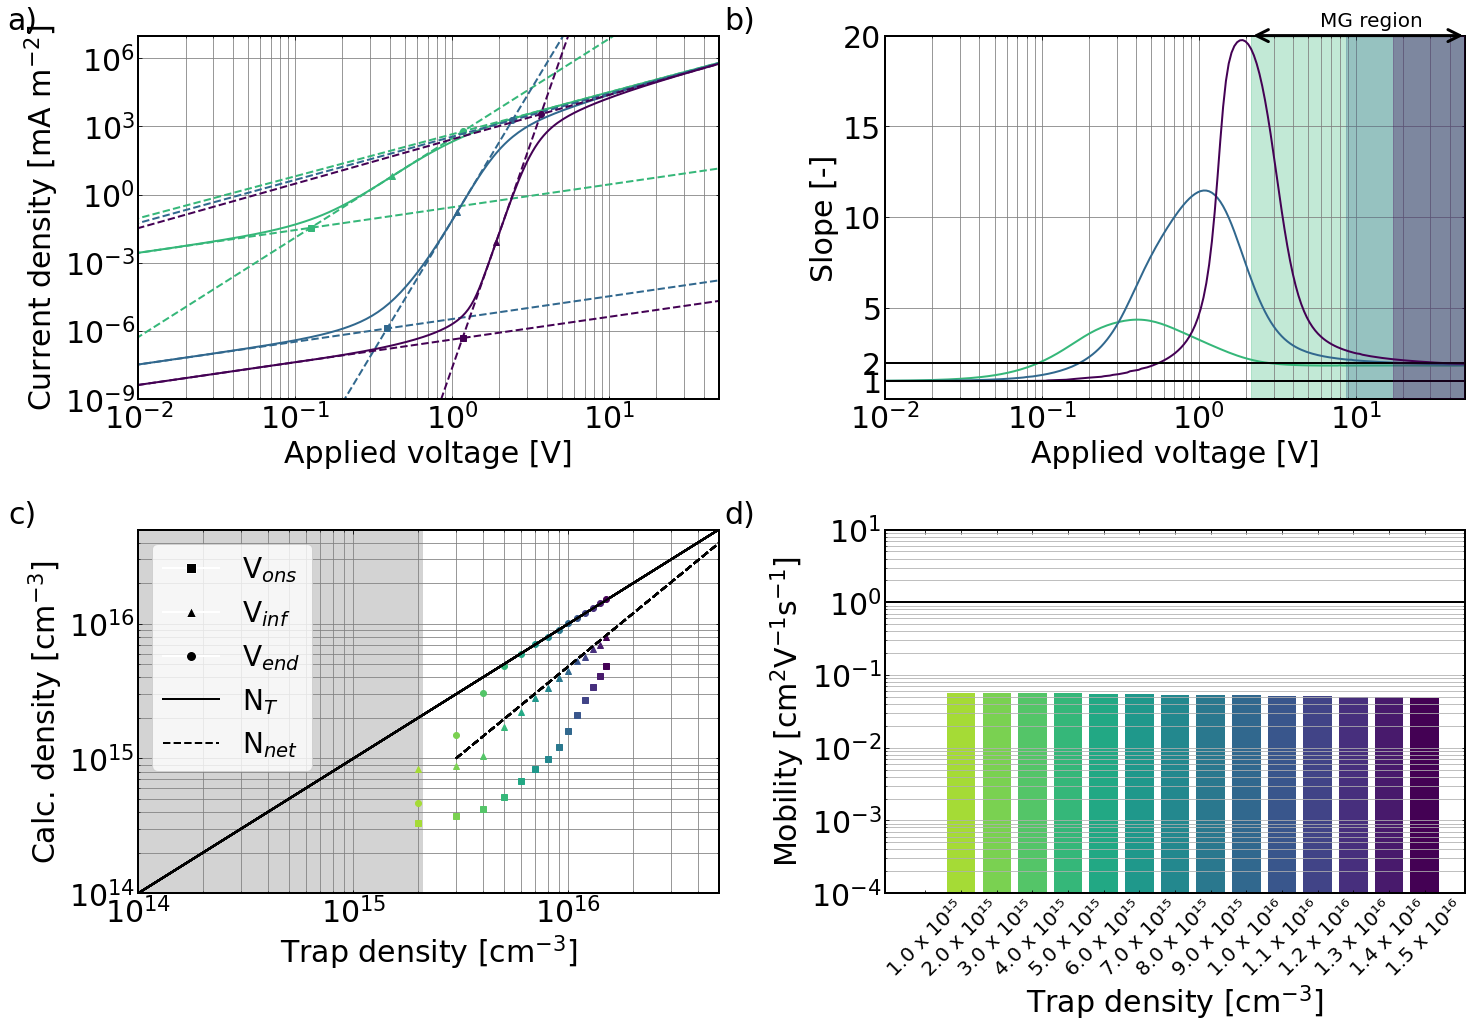

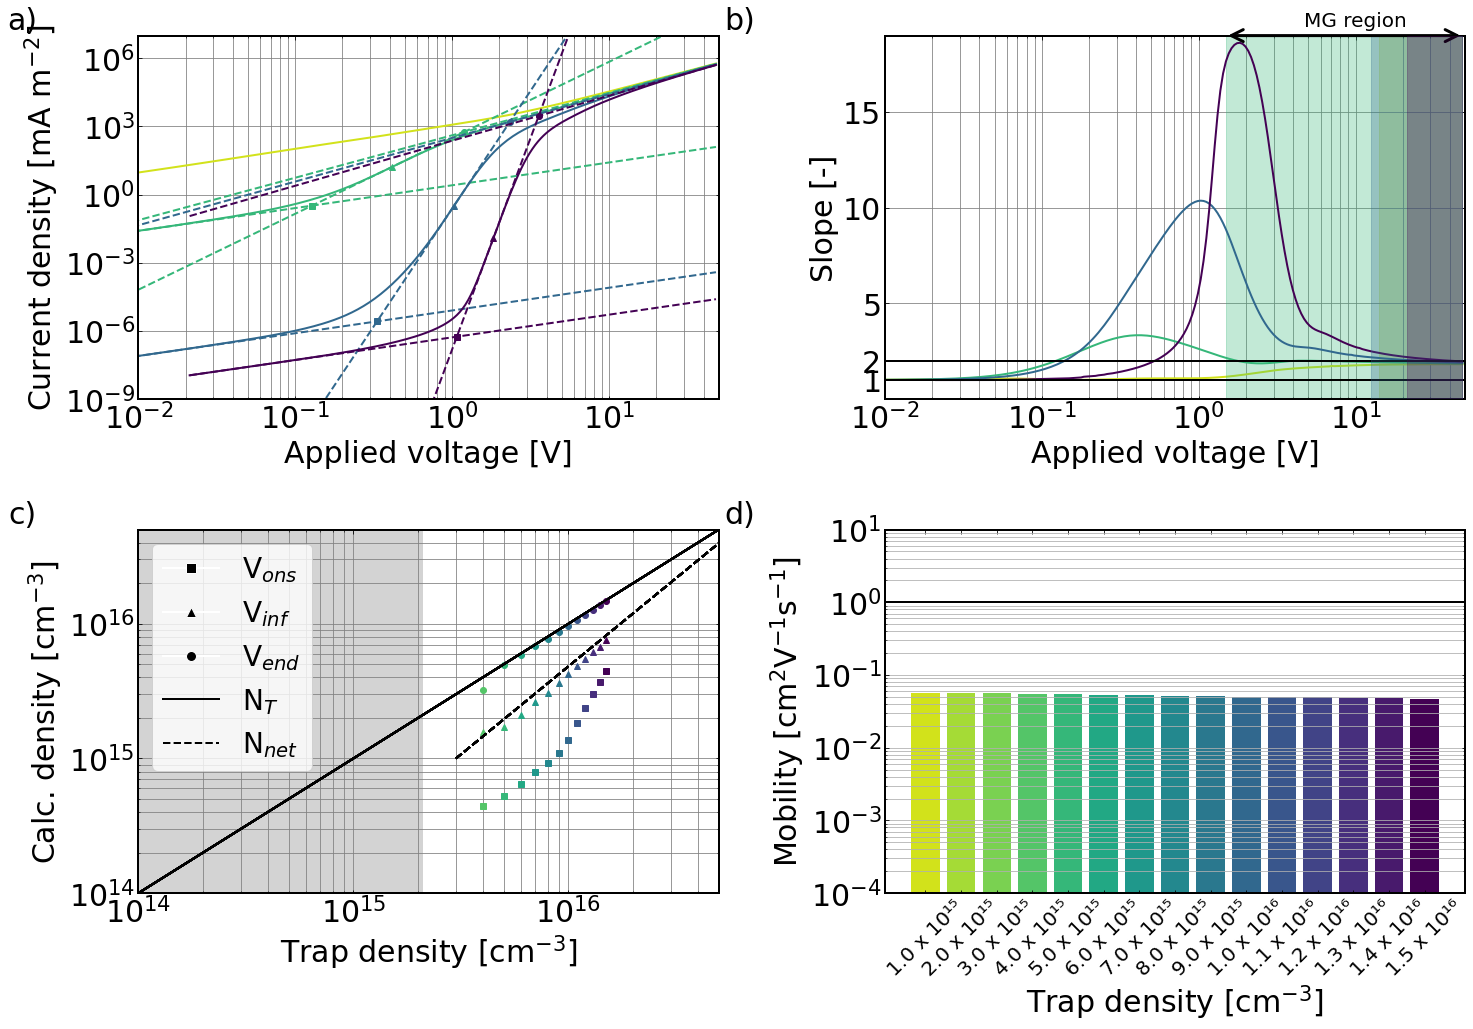

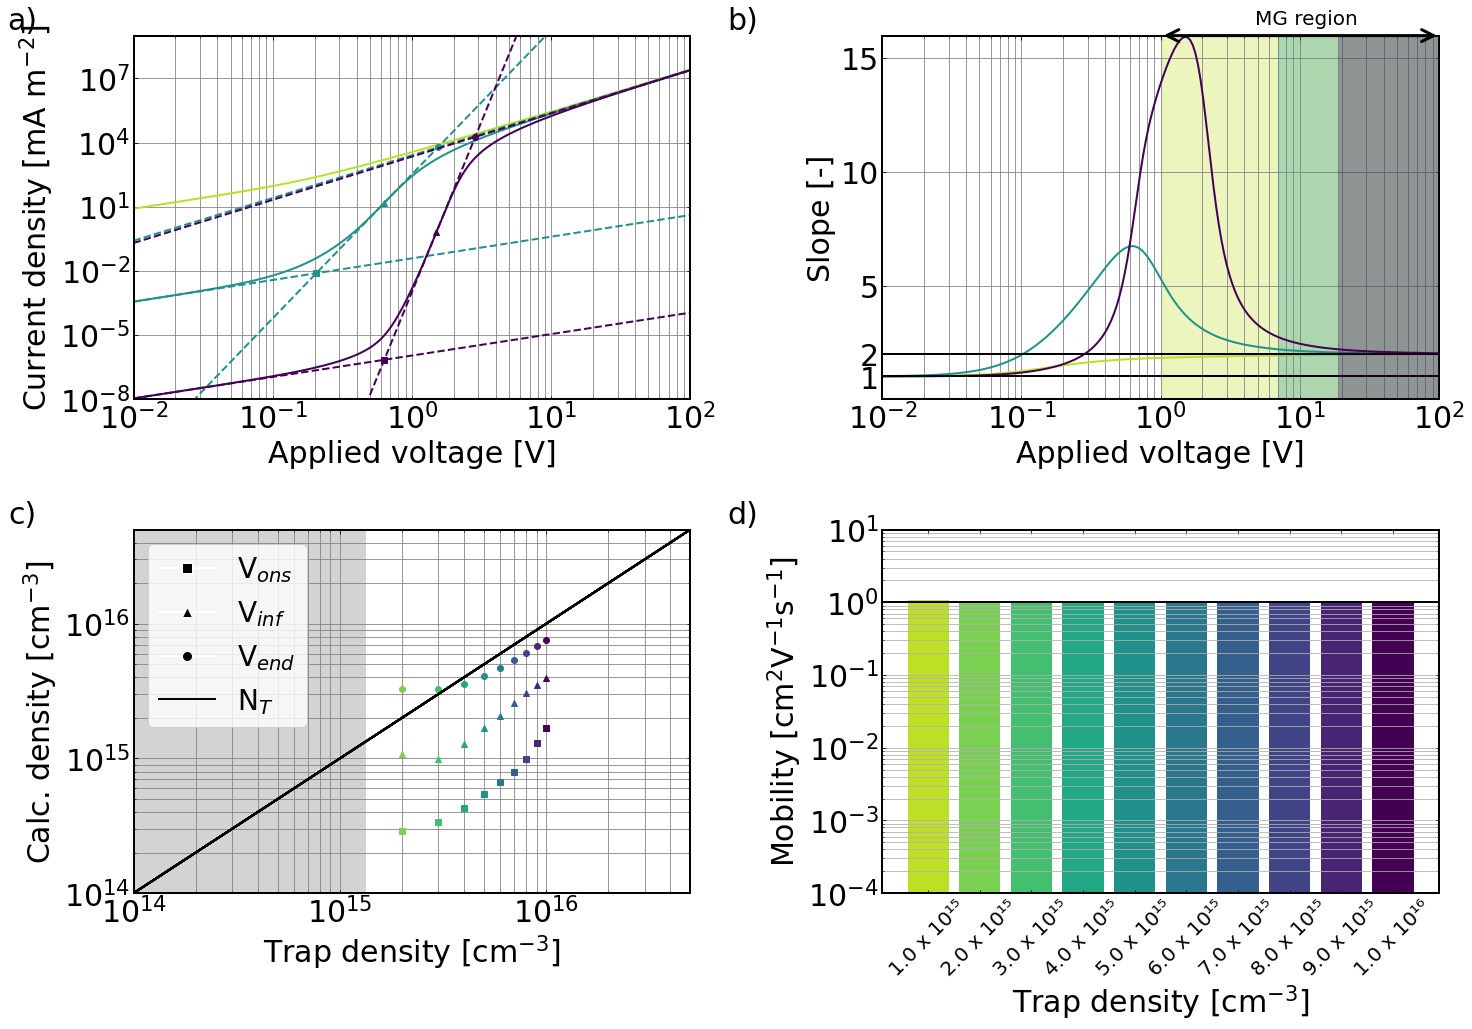

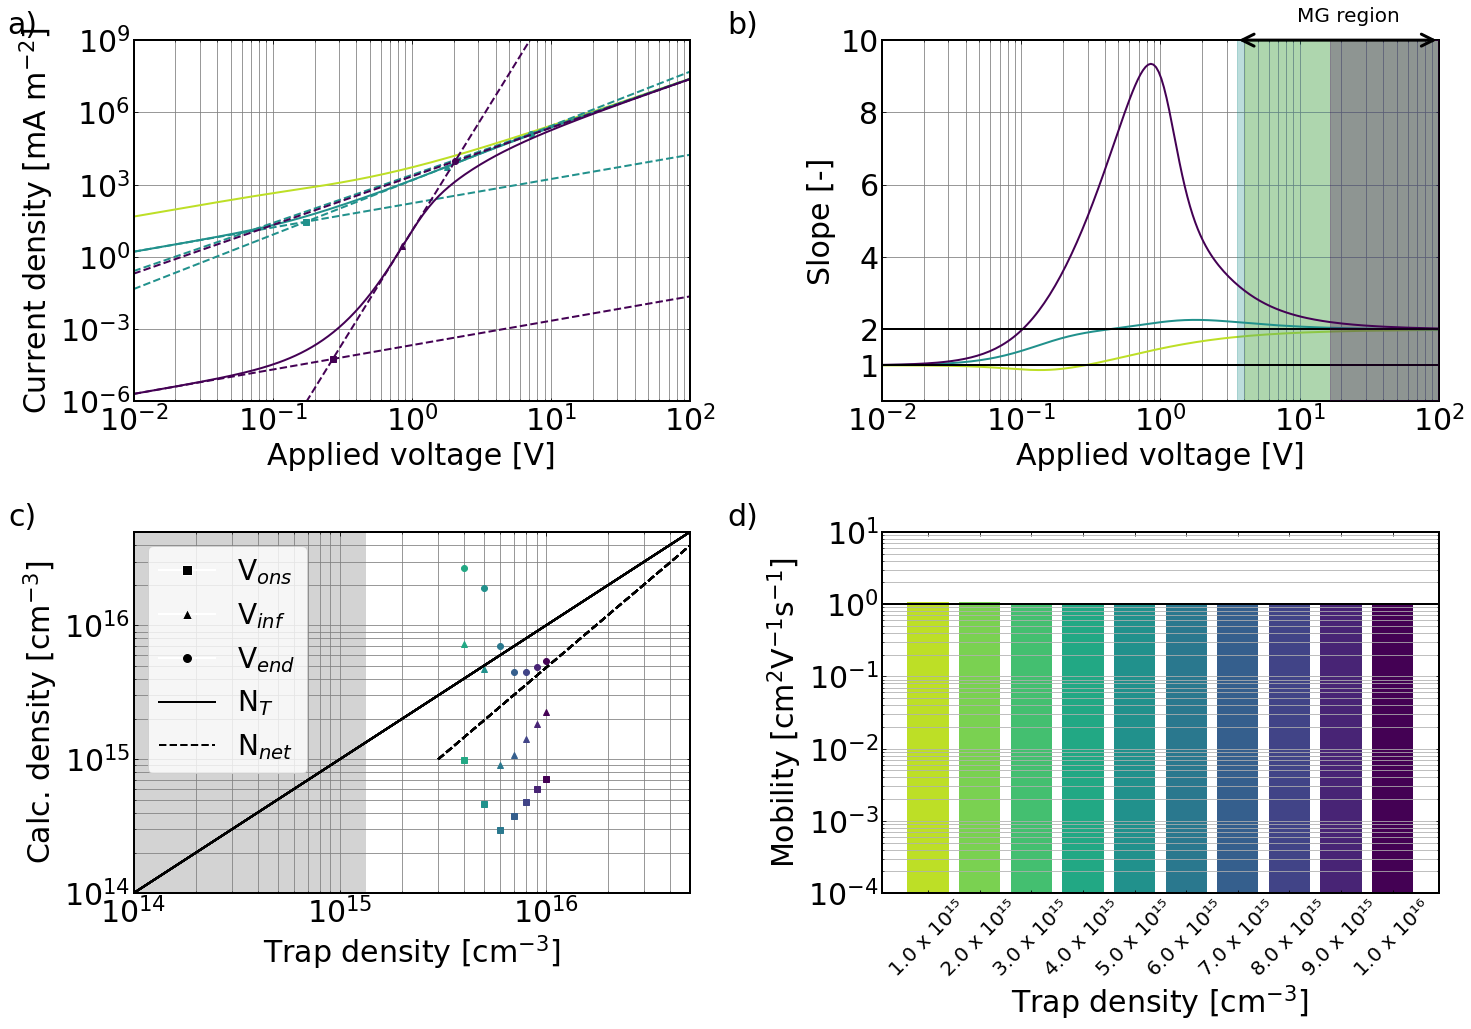

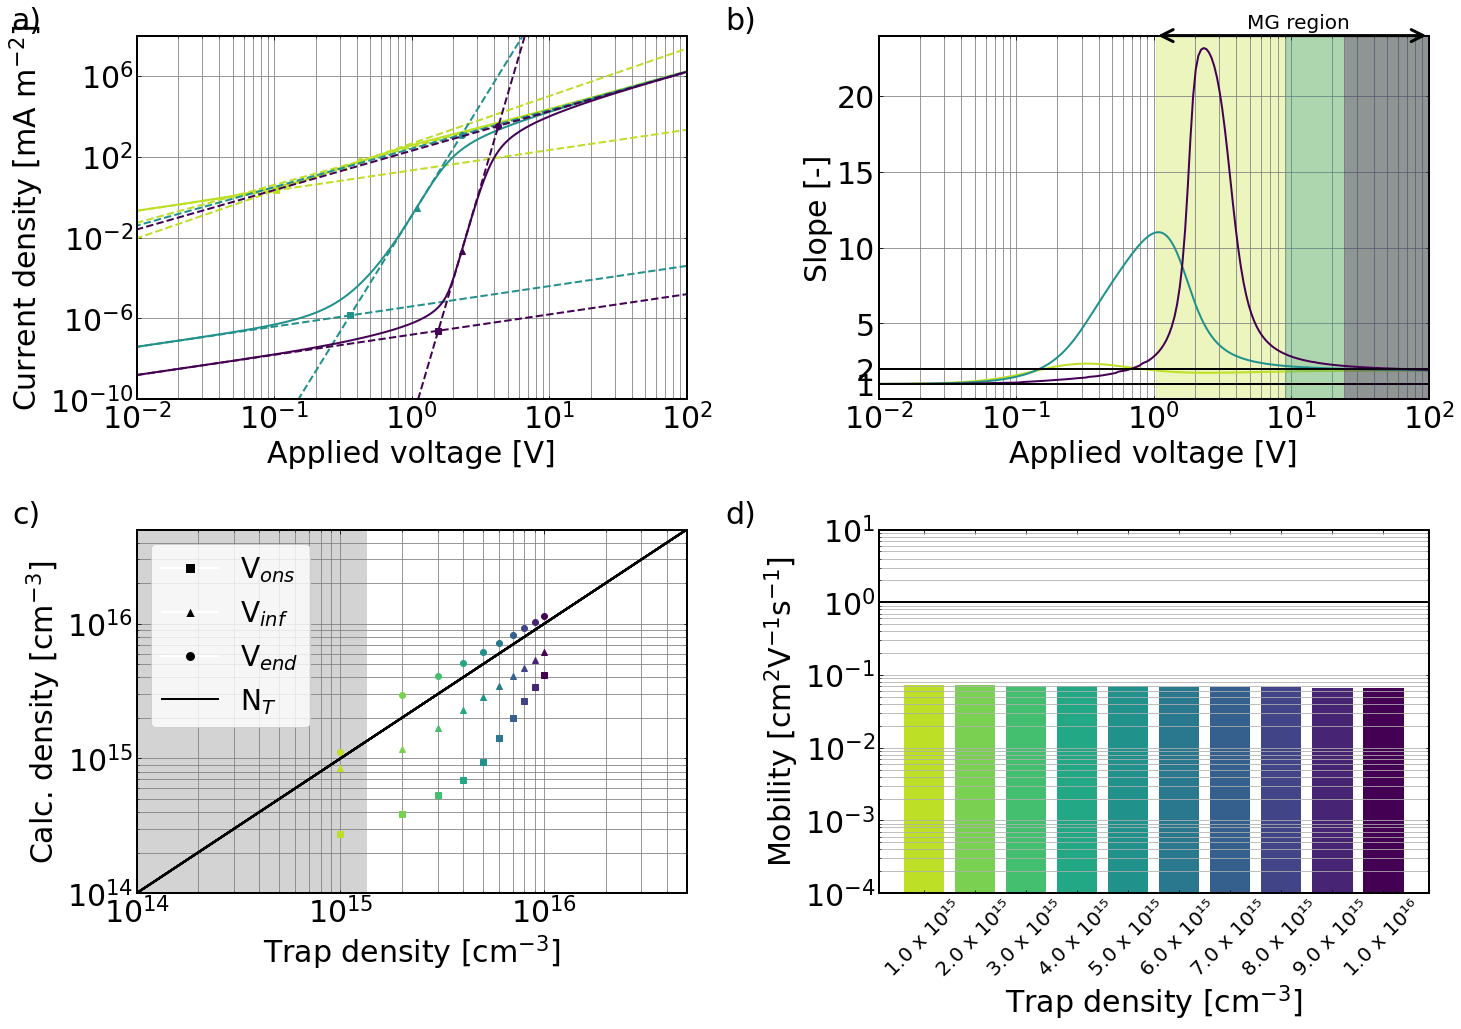

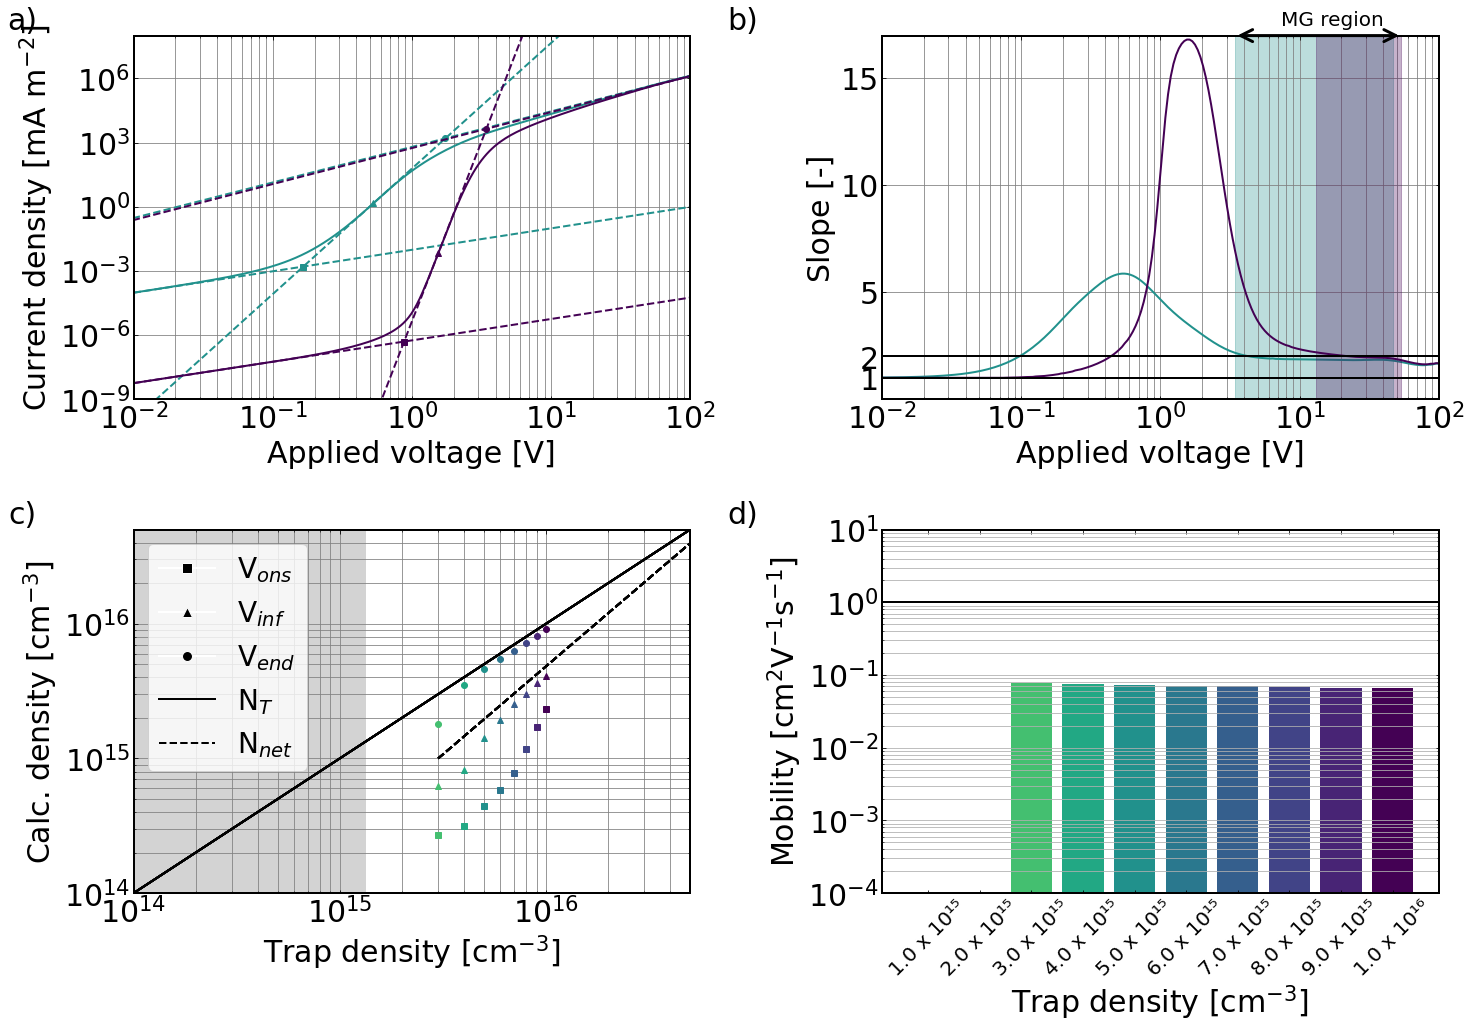

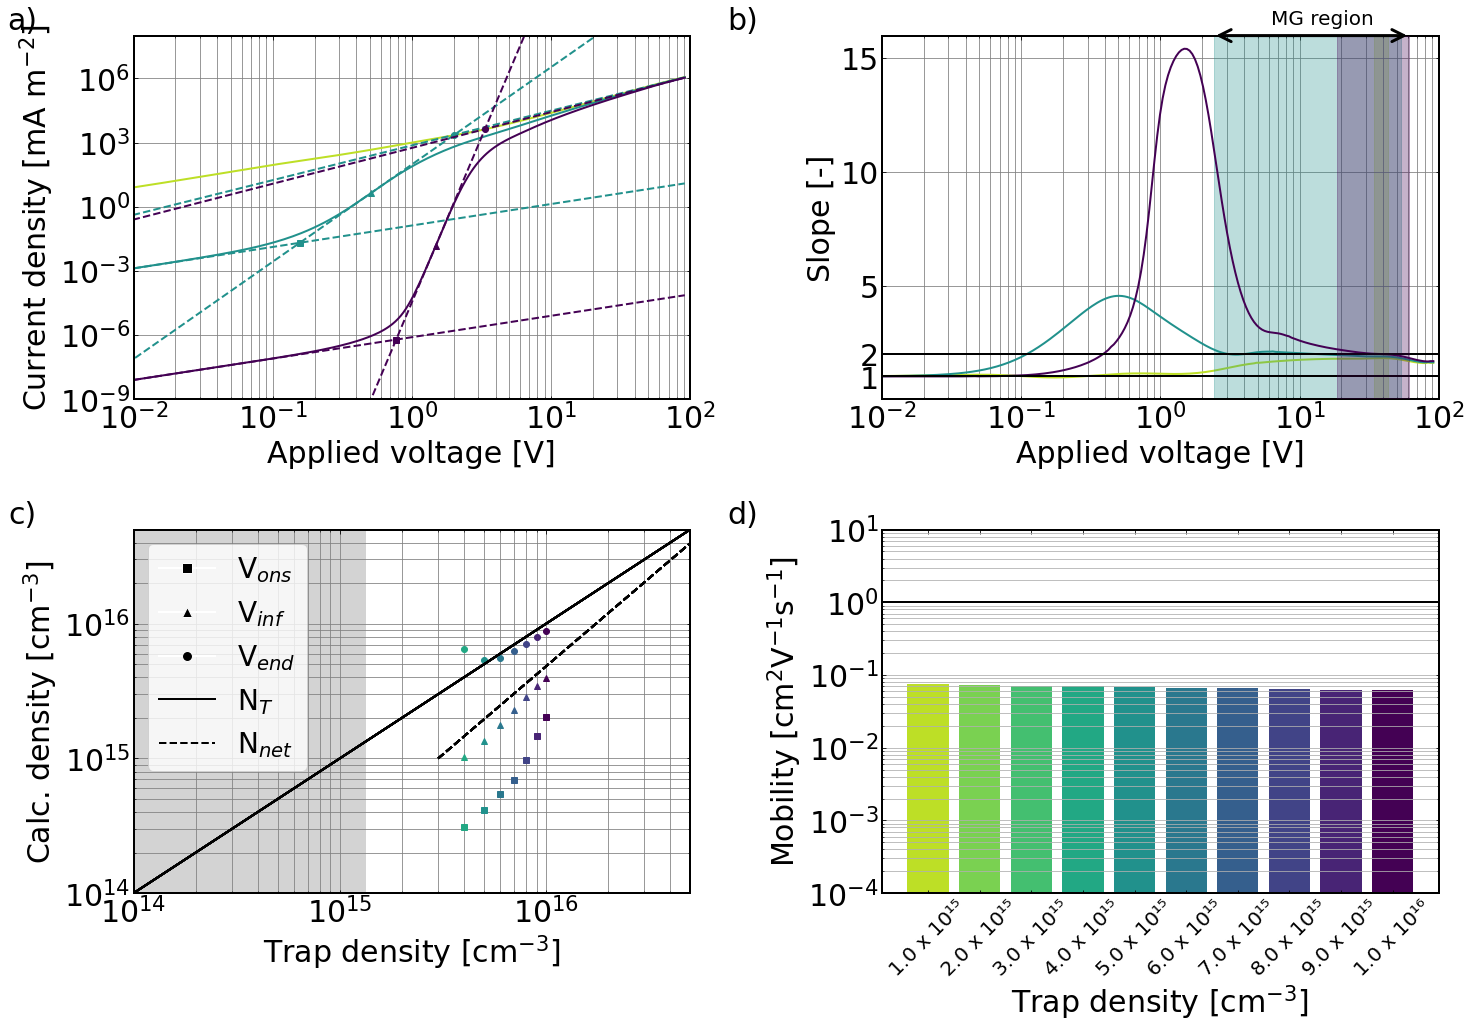

In [2]:
Ls = [500e-9,800e-9,1000e-9]
eps_r_pero = 24
ions_pero = 2e21

rerun  = False
for L_pero in Ls:

    if L_pero == 1000e-9:
        N_t_bulk_list = np.linspace(1e21,1e22,10)
        Vmax = 100
    else:
        N_t_bulk_list = np.linspace(1e21,1.5e22,15)
        Vmax = 50

    # # No TLs without ions
    with_TL = False
    ions = 0
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_notl.txt')
    str_save = 'notl'
    Vscan = -1
    NP = 1000
    tolPois = 1e-7
    tolDens = 1e-7
    couplePC = 4
    minAcc = 1
    maxAcc = 1
    grad = 1
    run_all(L_pero, eps_r_pero, ions, N_t_bulk_list, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

    # # No TLs with ions
    with_TL = False
    ions = ions_pero
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_notl.txt')
    str_save = 'ions_notl'
    Vscan = 1
    NP = 1000
    tolPois = 1e-7
    tolDens = 1e-6
    couplePC = 10
    minAcc = 1e-1
    maxAcc = 1e-1
    grad = 4
    run_all(L_pero, eps_r_pero, ions, N_t_bulk_list, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

    # # TLs without ions
    with_TL = True
    ions = 0
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
    str_save = 'tl'
    Vscan = -1
    NP = 1000
    tolPois = 1e-7
    tolDens = 1e-6
    couplePC = 10
    minAcc = 1e-1
    maxAcc = 1e-1
    grad = 4
    run_all(L_pero, eps_r_pero, ions, N_t_bulk_list, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)
    
    # # TLs with ions
    with_TL = True
    ions = ions_pero
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
    str_save = 'ions_tl'
    Vscan = 1
    NP = 550
    tolPois = 1e-7
    tolDens = 1e-6
    couplePC = 10
    minAcc = 1e-1
    maxAcc = 1e-1
    grad = 4
    run_all(L_pero, eps_r_pero, ions, N_t_bulk_list, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

    # # TLs with ions and ions in TLs
    with_TL = True
    ions = ions_pero
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
    str_save = 'ions_in_tl'
    Vscan = -1
    NP = 550
    tolPois = 1e-7
    tolDens = 1e-6
    couplePC = 10
    minAcc = 1e-1
    maxAcc = 1e-1
    grad = 4
    ions_in_TLs = True
    run_all(L_pero, eps_r_pero, ions, N_t_bulk_list, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun, ions_in_TLs)



# Vary ions

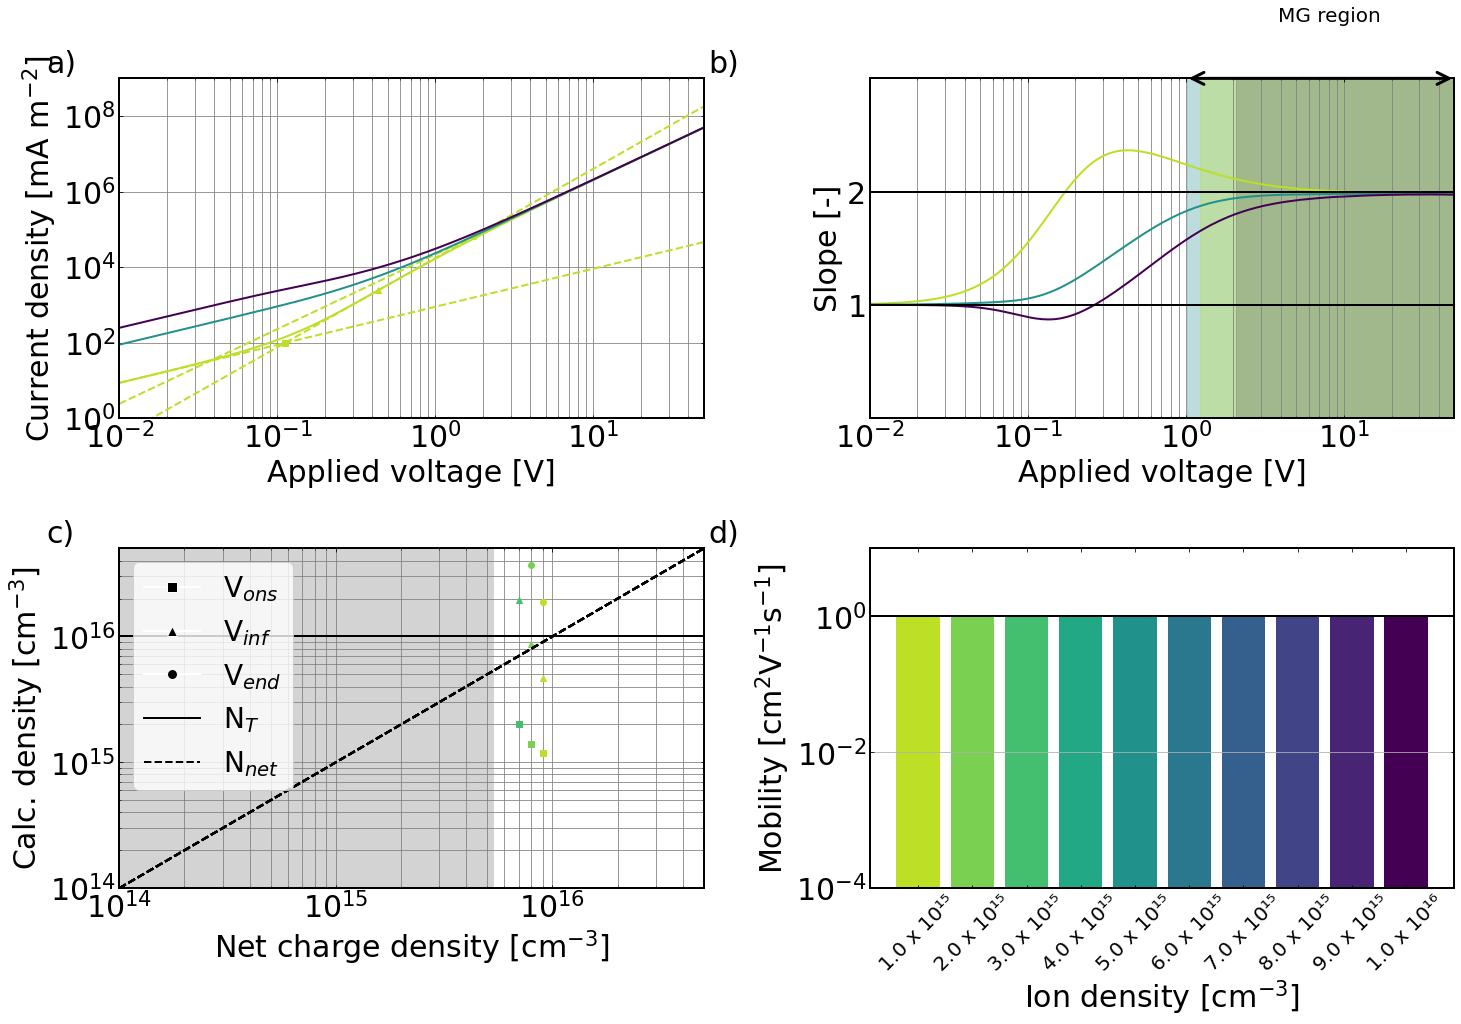

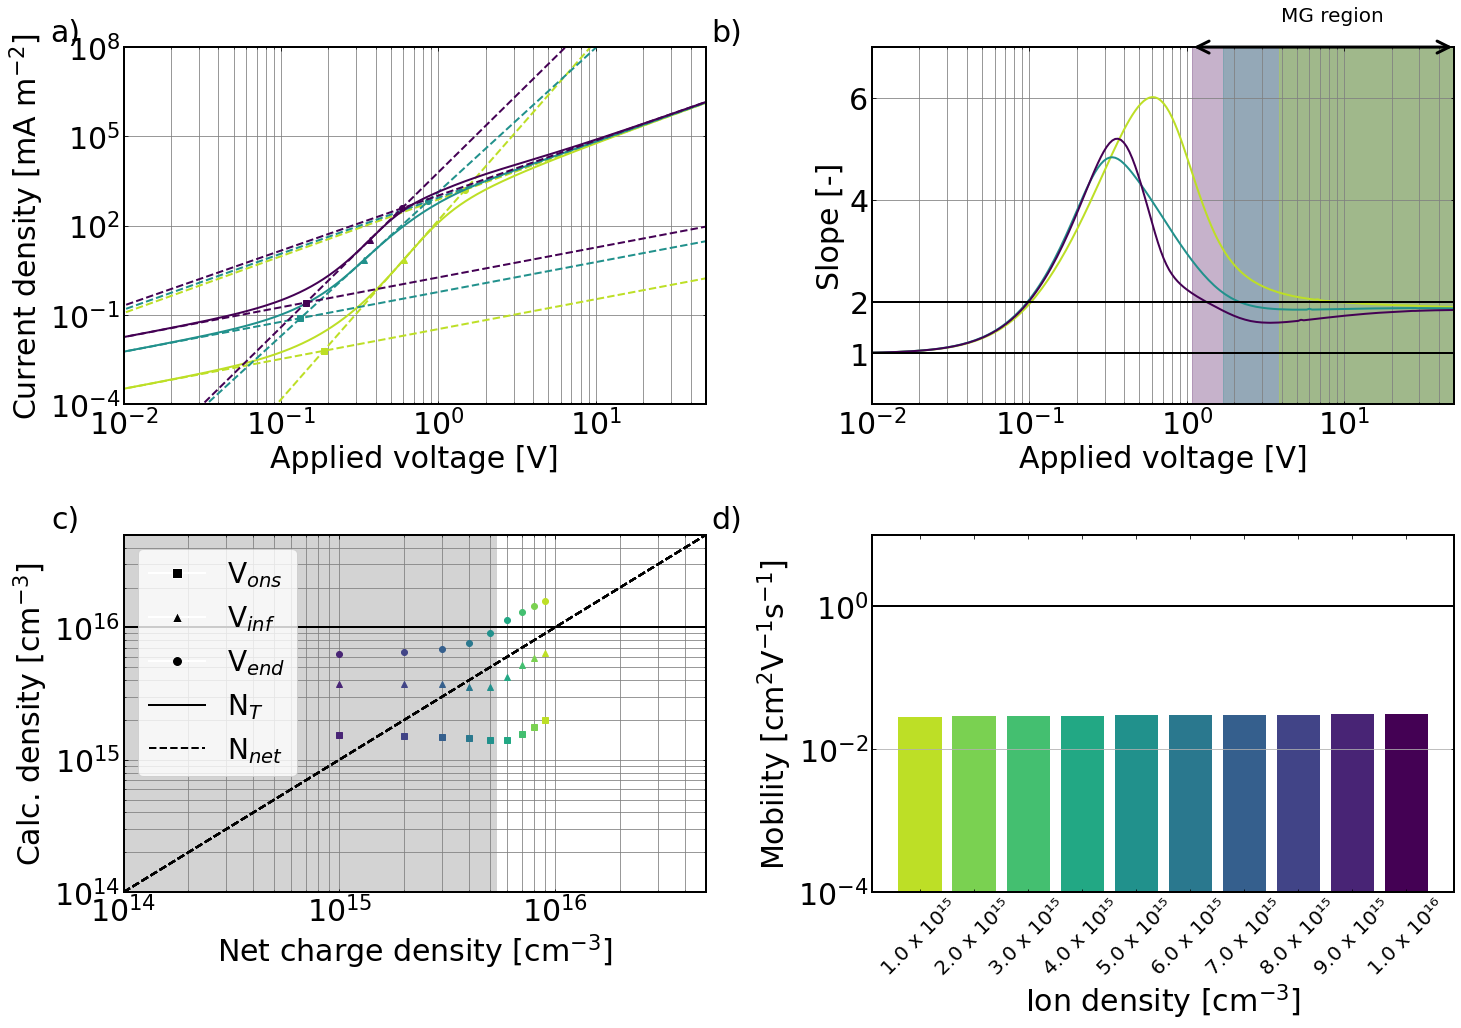

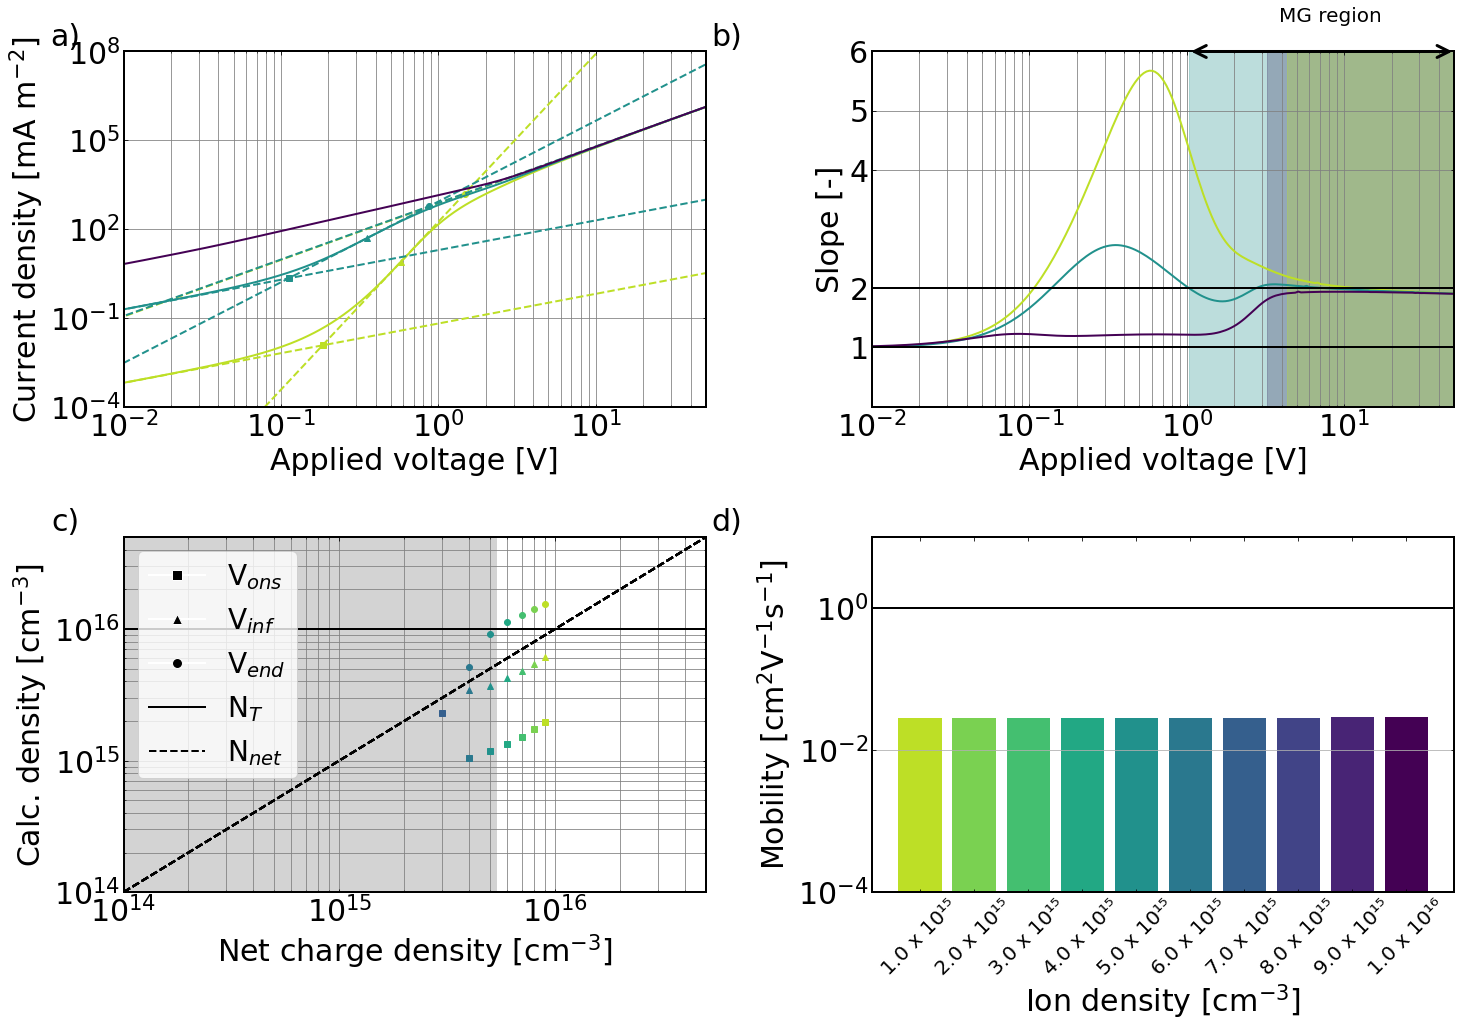

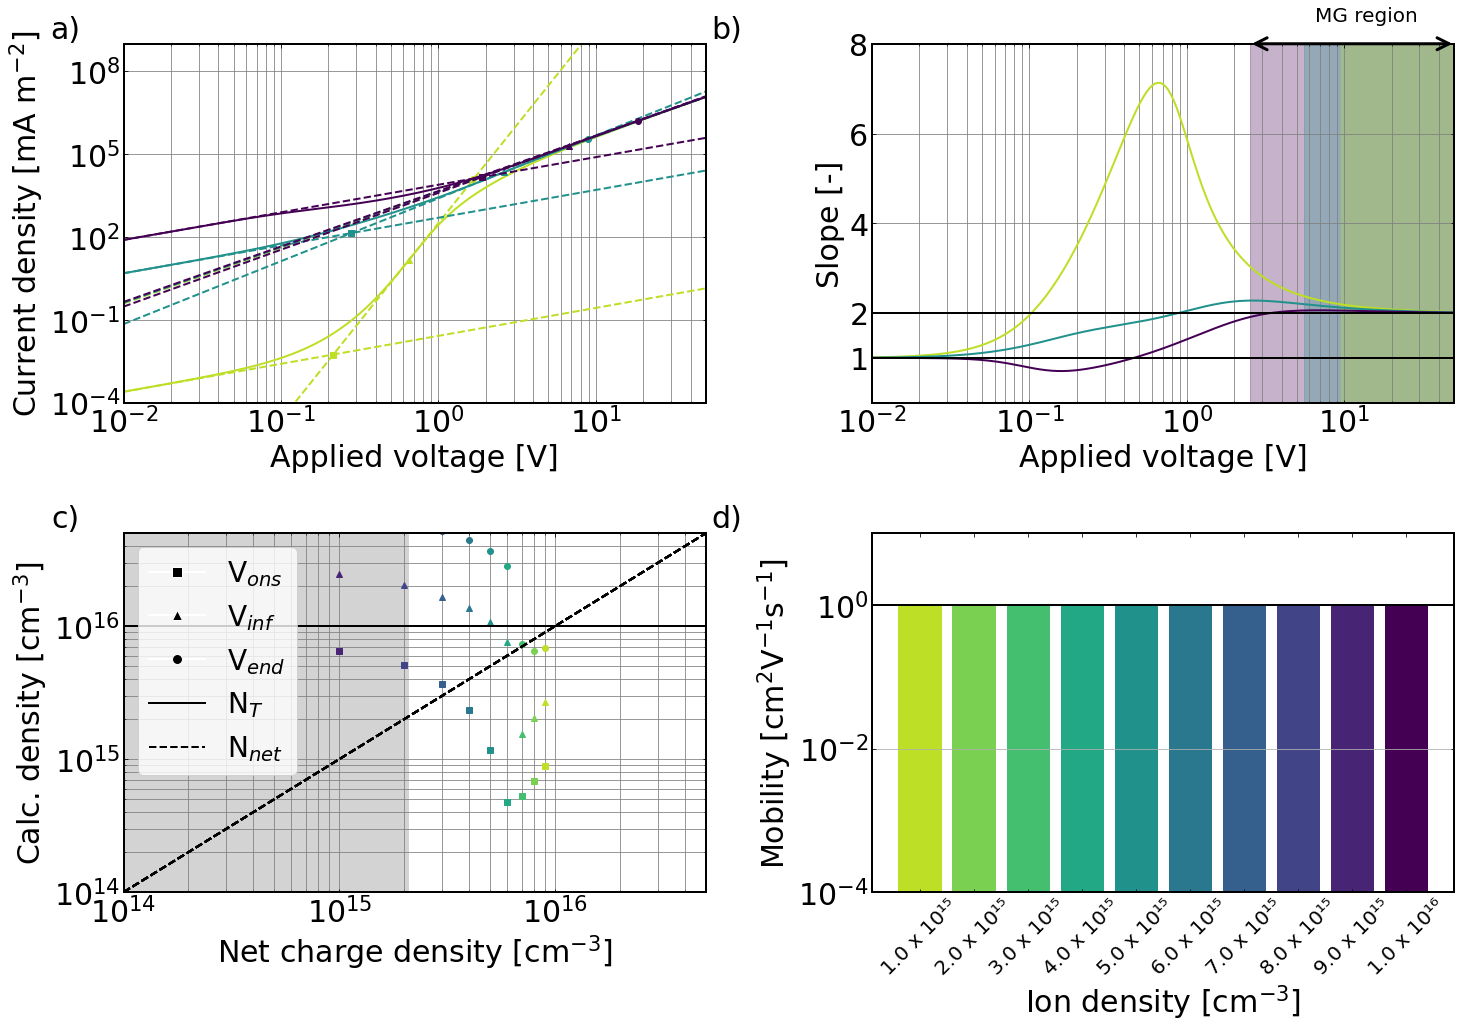

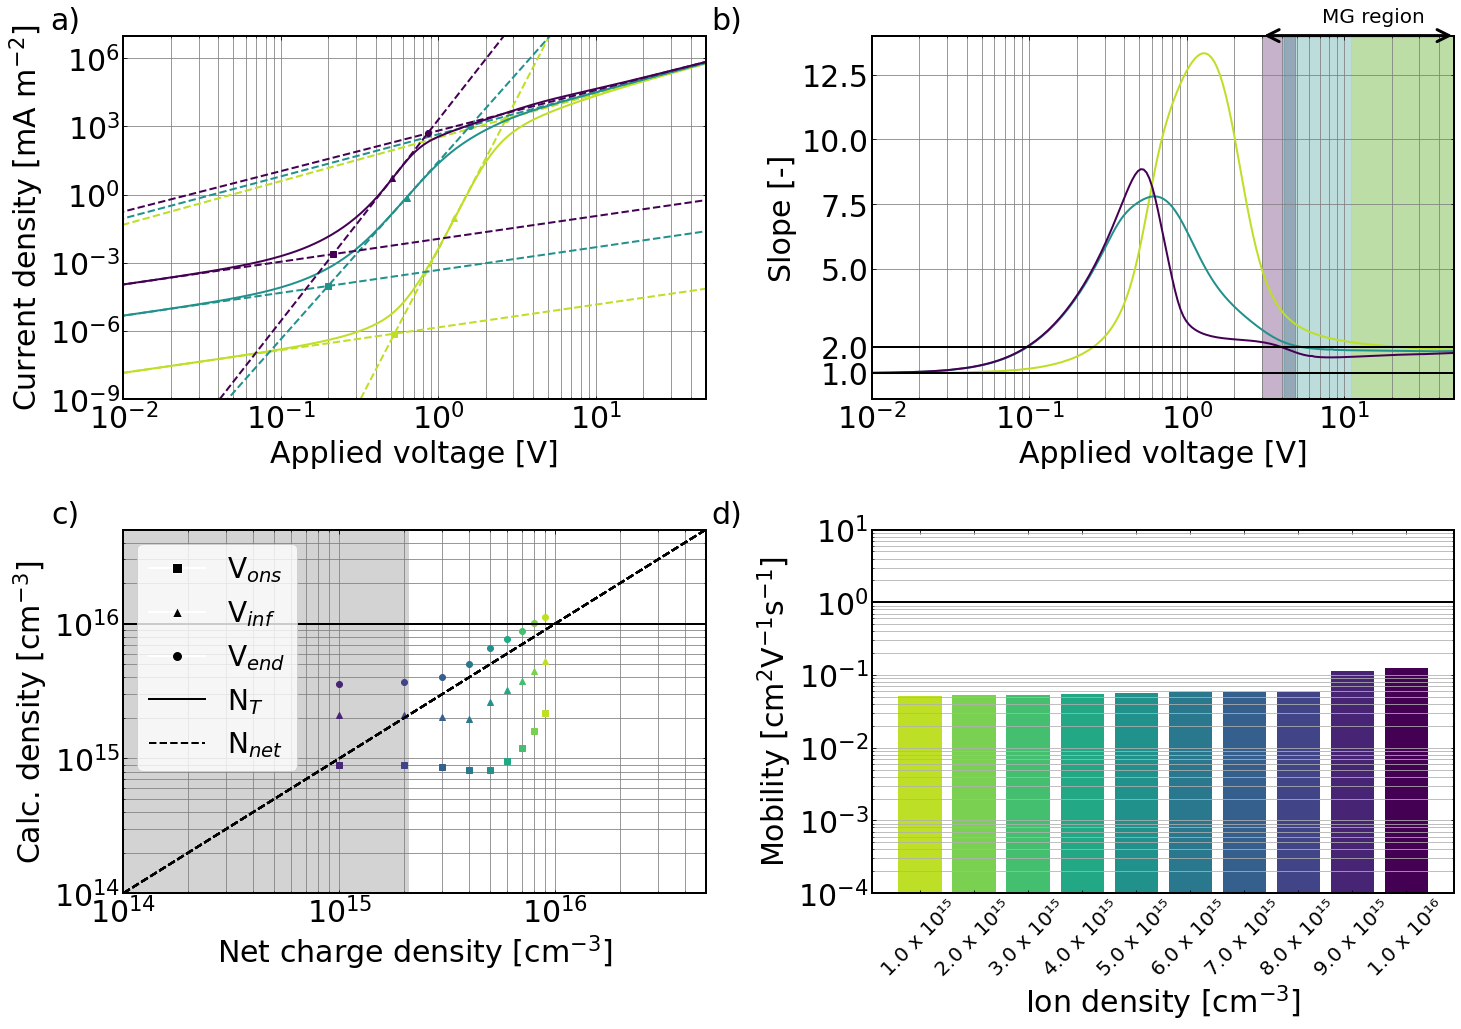

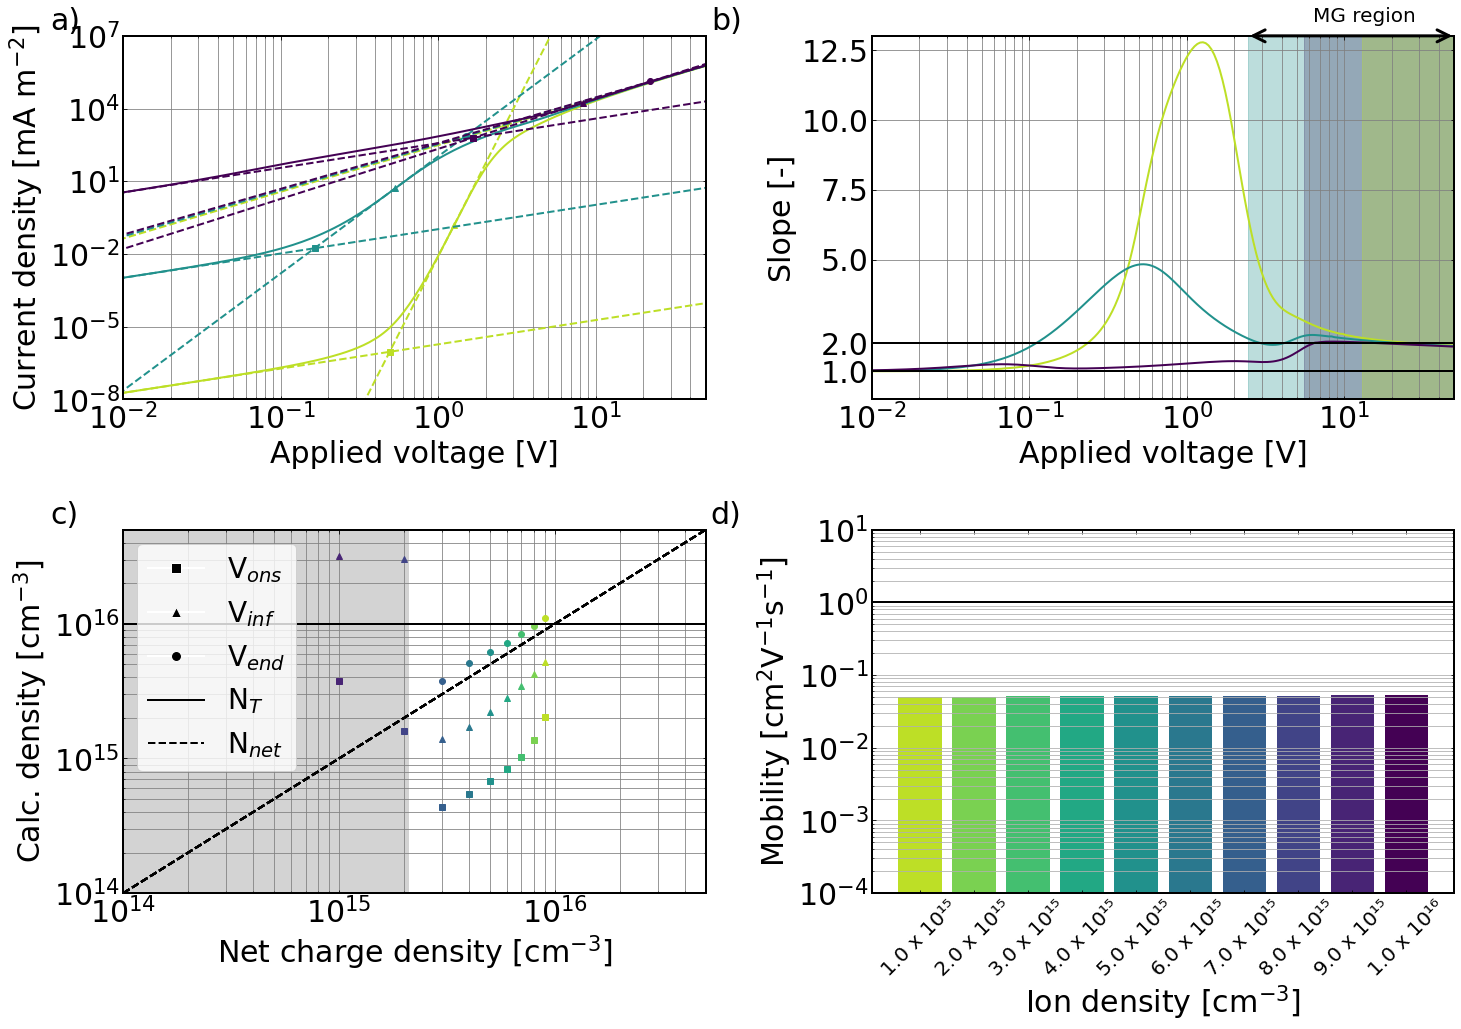

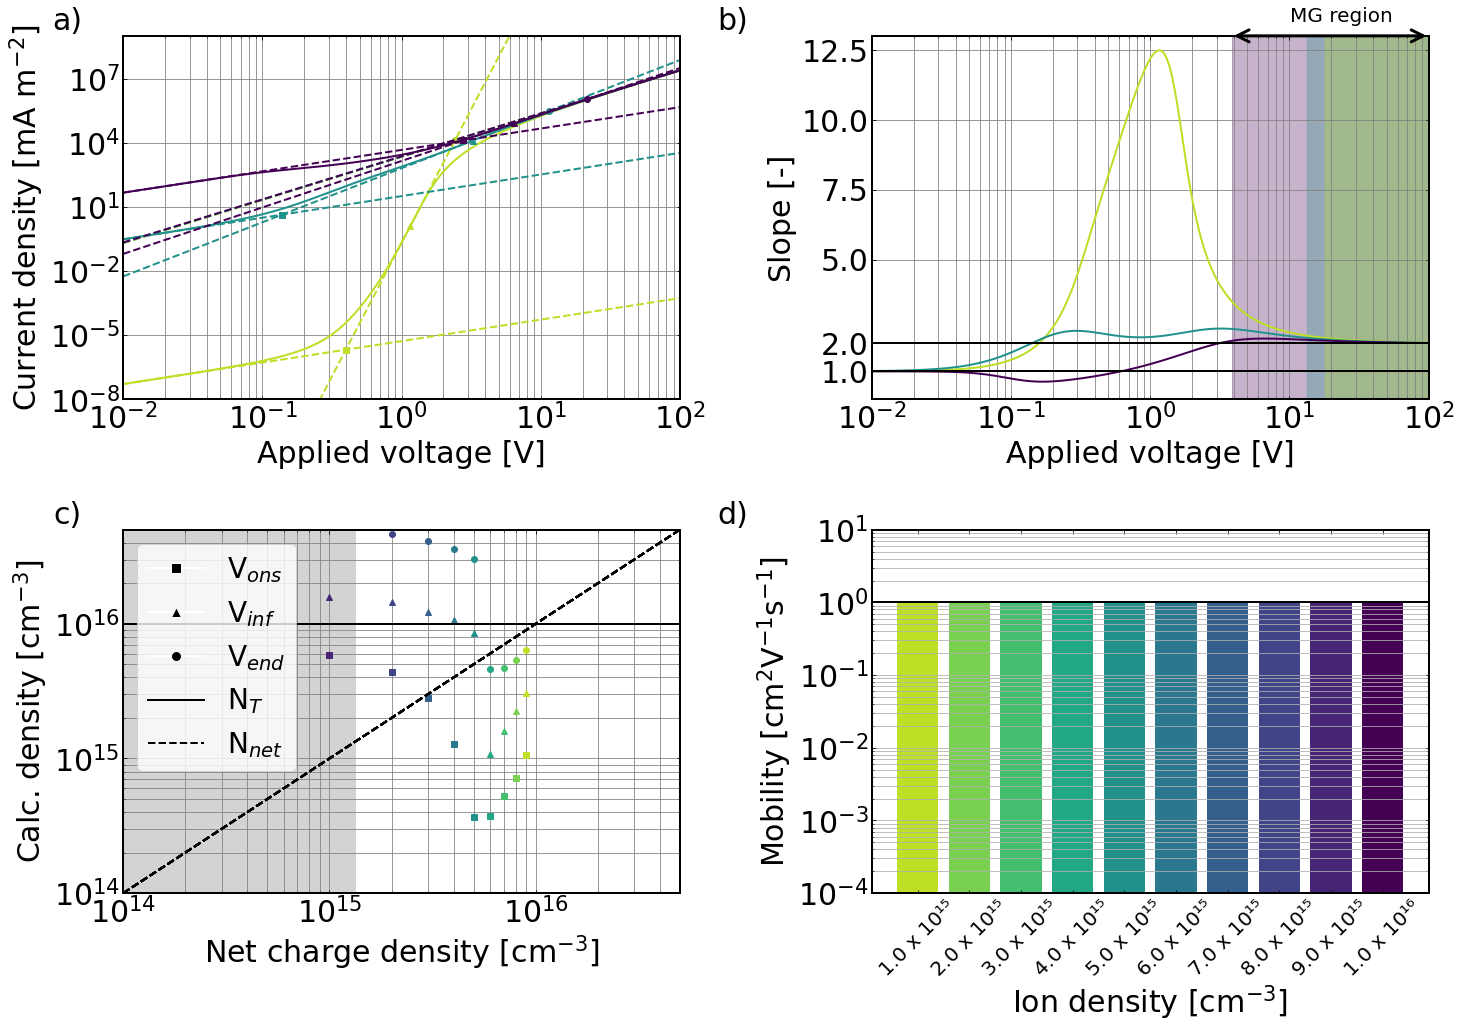

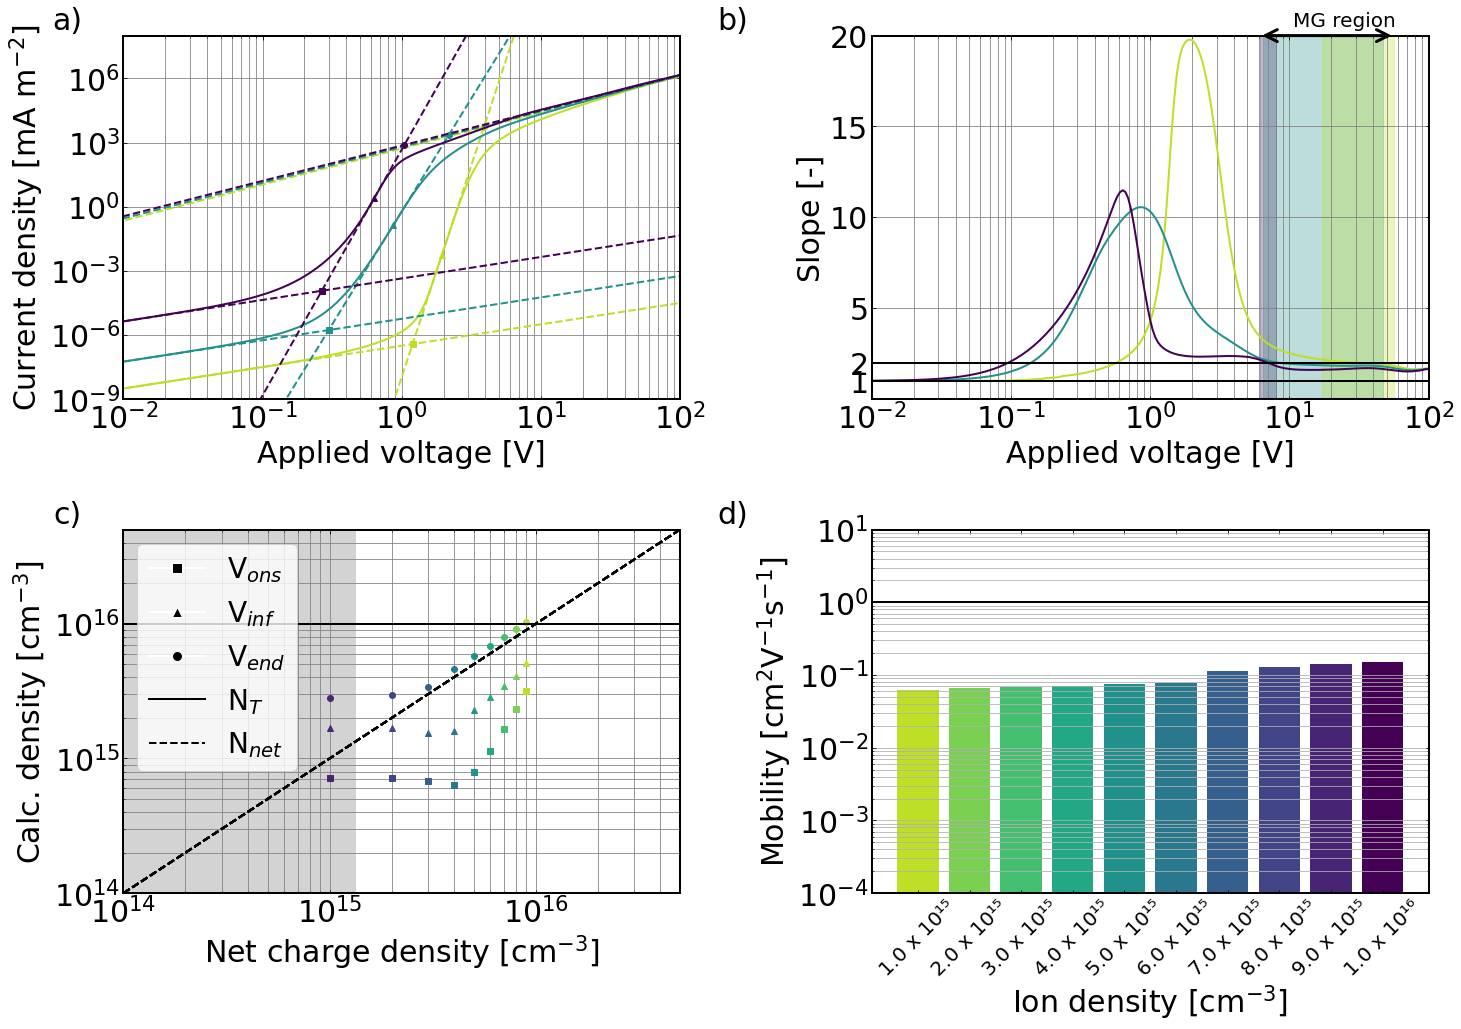

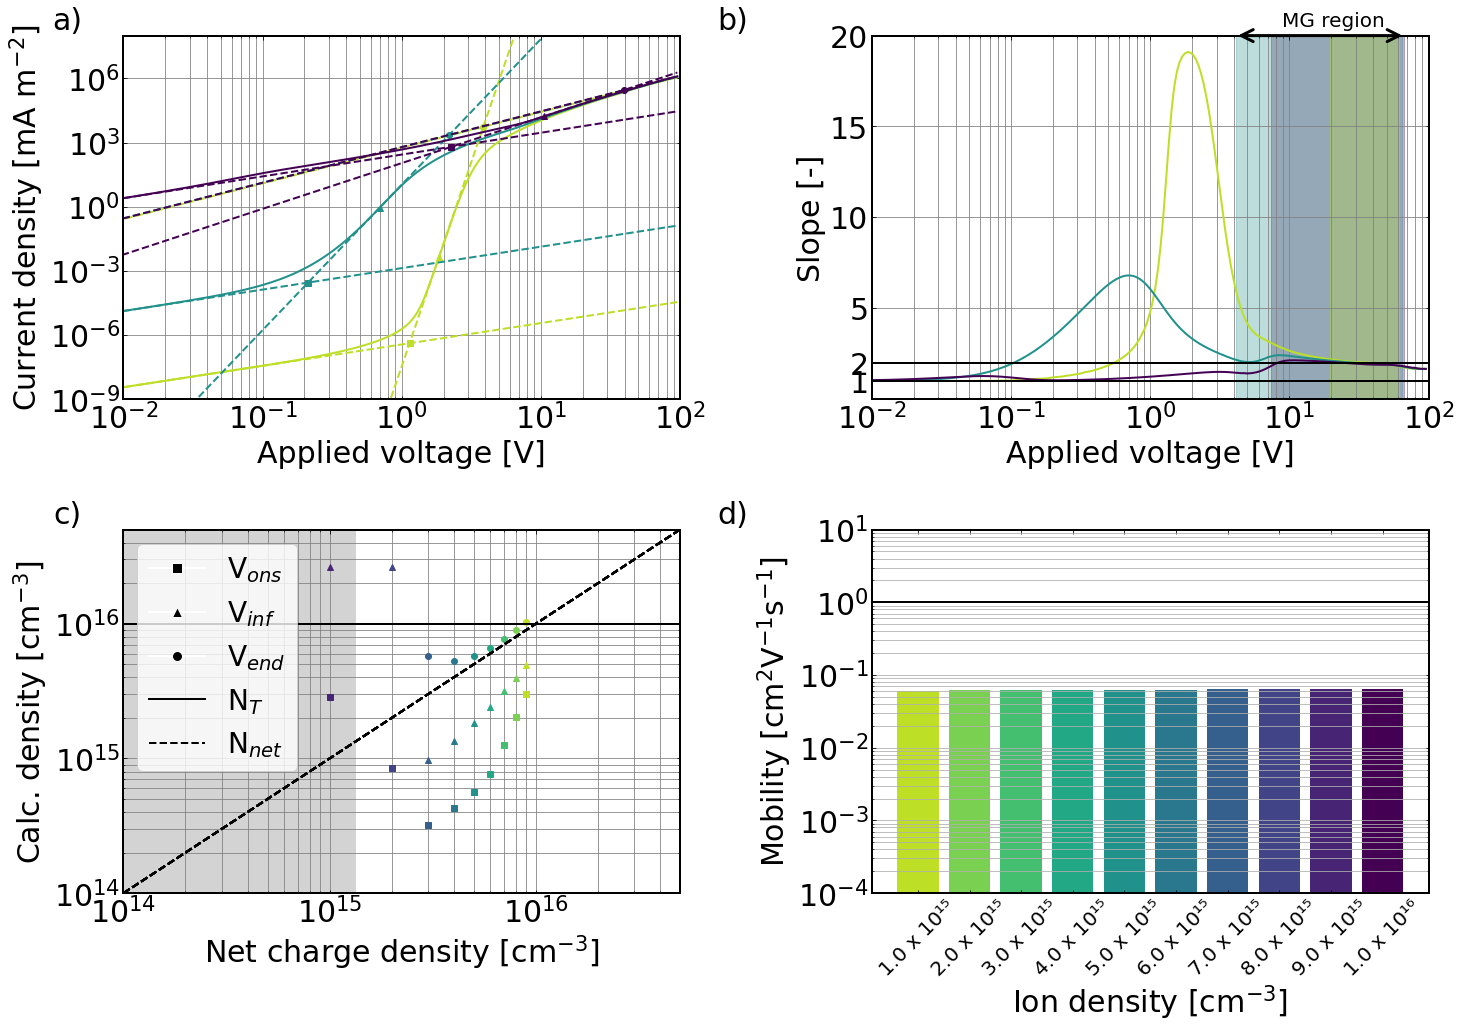

In [3]:
Ls = [500e-9,800e-9,1000e-9]
eps_r_pero = 24
traps_pero = 1e22
ions_bulk_list = np.linspace(1e21,1e22,10)
Vscan = 1
tolPois = 1e-7
tolDens = 1e-6
couplePC = 10
minAcc = 1e-1
maxAcc = 1e-1
grad = 4
rerun = False
for L_pero in Ls:
    if L_pero == 1000e-9:
        Vmax = 100
    else:
        Vmax = 50
    # # No TLs 
    with_TL = False
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_notl.txt')
    str_save = 'ions_notl'
    NP = 1000
    run_all_ions(L_pero, eps_r_pero, ions_bulk_list, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

    # # TLs
    with_TL = True
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
    str_save = 'ions_tl'
    NP = 550
    run_all_ions(L_pero, eps_r_pero, ions_bulk_list, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)


    # # TLs with ions in TLs
    with_TL = True
    simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
    str_save = 'ions_in_tl'
    NP = 550
    ions_in_TLs = True
    run_all_ions(L_pero, eps_r_pero, ions_bulk_list, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun, ions_in_TLs)

# Vary epsilon TL

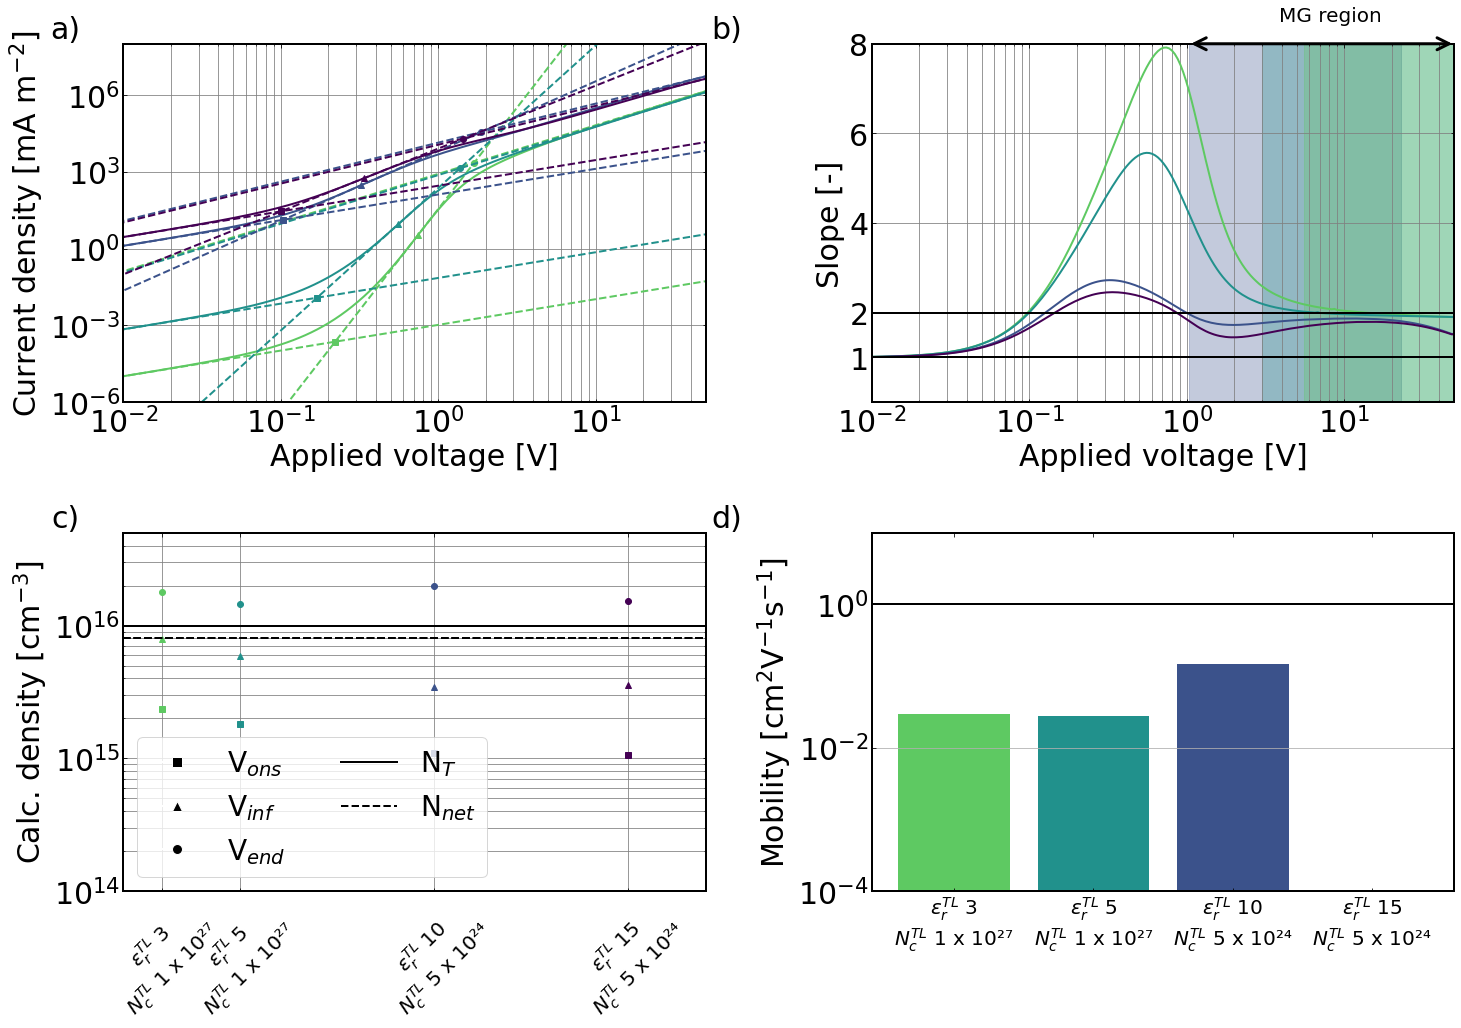

In [4]:
to_plot = [3,5,10,15]
eps_TL_list = [3,5,10,15]
Nc_TL_list = [1e27,1e27,5e24,5e24]
mob_TL_list = [1e-7,1e-7,1e-6,1e-6]
L_pero = 500e-9 # m 
traps_pero = 1e22
ions_pero = 2e21
eps_r_pero = 24
# # TLs
Vmax = 50
with_TL = True
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
str_save = ''
Vscan = 1
NP = 550
tolPois = 1e-7
tolDens = 1e-6
couplePC = 10
minAcc = 1e-1
maxAcc = 1e-1
grad = 4
rerun = False
run_all_TLs(eps_TL_list,Nc_TL_list,mob_TL_list,L_pero, eps_r_pero, ions_pero, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

# Vary energetic offset


### Injection barrier

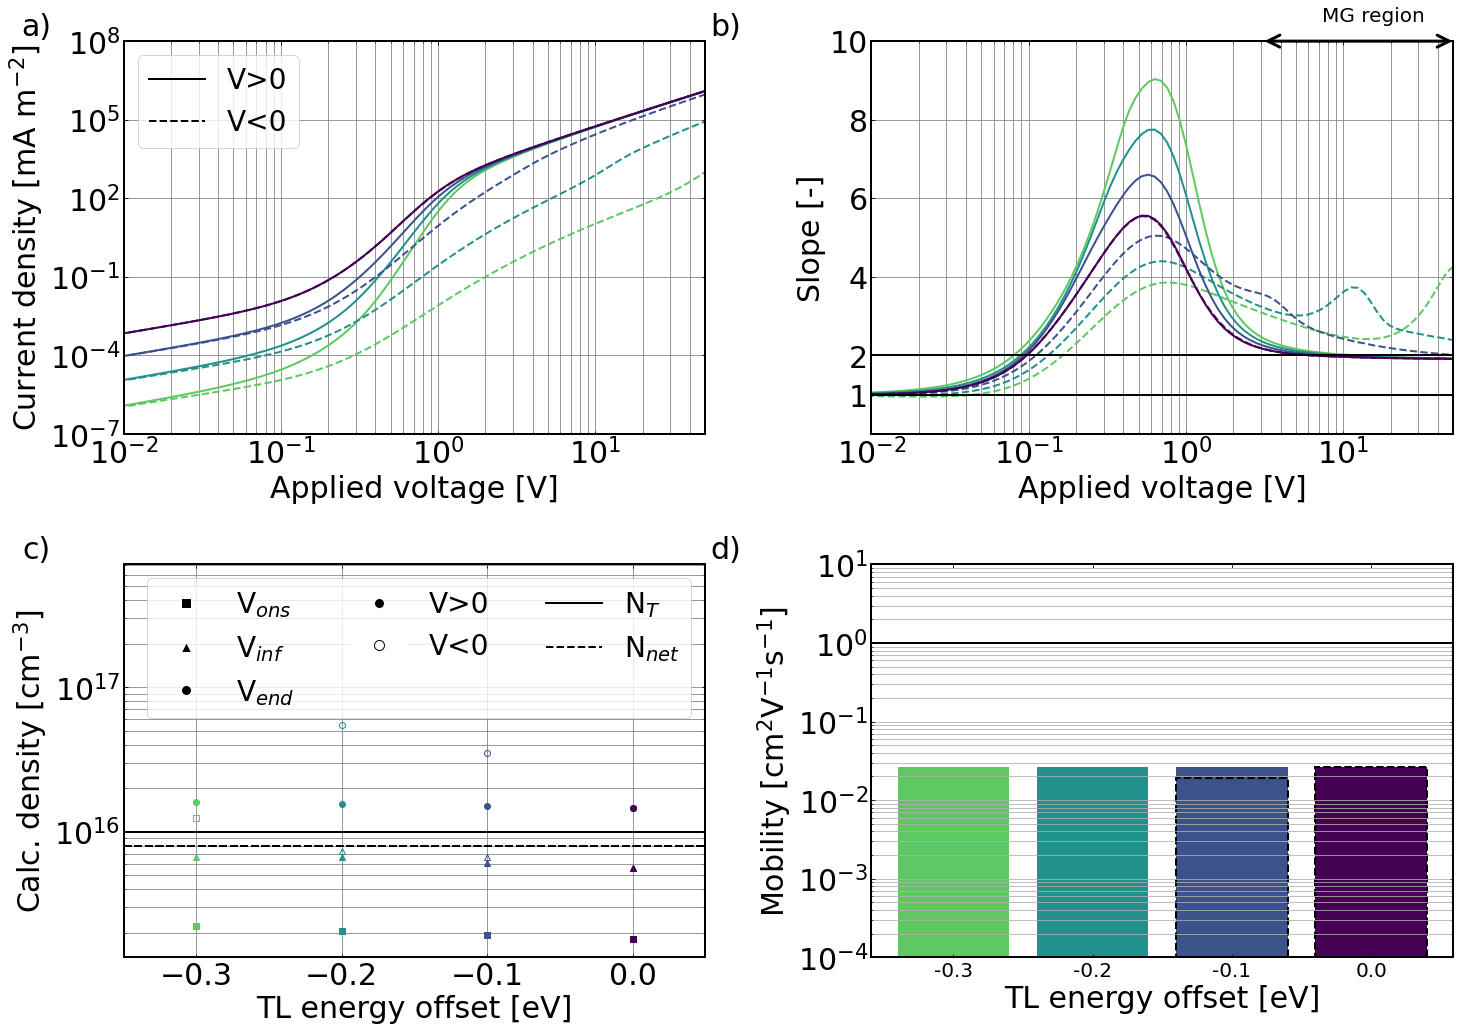

In [5]:
to_plot = [3.9,4,4.1,4.2]
nrj_list = [4.2,4.1,4,3.9]
Nc_TL = 1e27
eps_TL = 5
mu_TL = 1e-7
L_pero = 500e-9 # m 
eps_r_pero = 24
traps_pero = 1e22
ions_pero = 2e21
timeout = str(9 * 60 ) # 9 minutes
Vmax = 50
with_TL = True
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
str_save = ''
Vscan = -1
NP = 550
tolPois = 1e-7
tolDens = 1e-6
couplePC = 10
minAcc = 1e-1
maxAcc = 1e-1
grad = 10
rerun = False
run_all_nrjs(nrj_list,eps_TL,Nc_TL,L_pero, eps_r_pero, ions_pero, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

### Extraction barrier

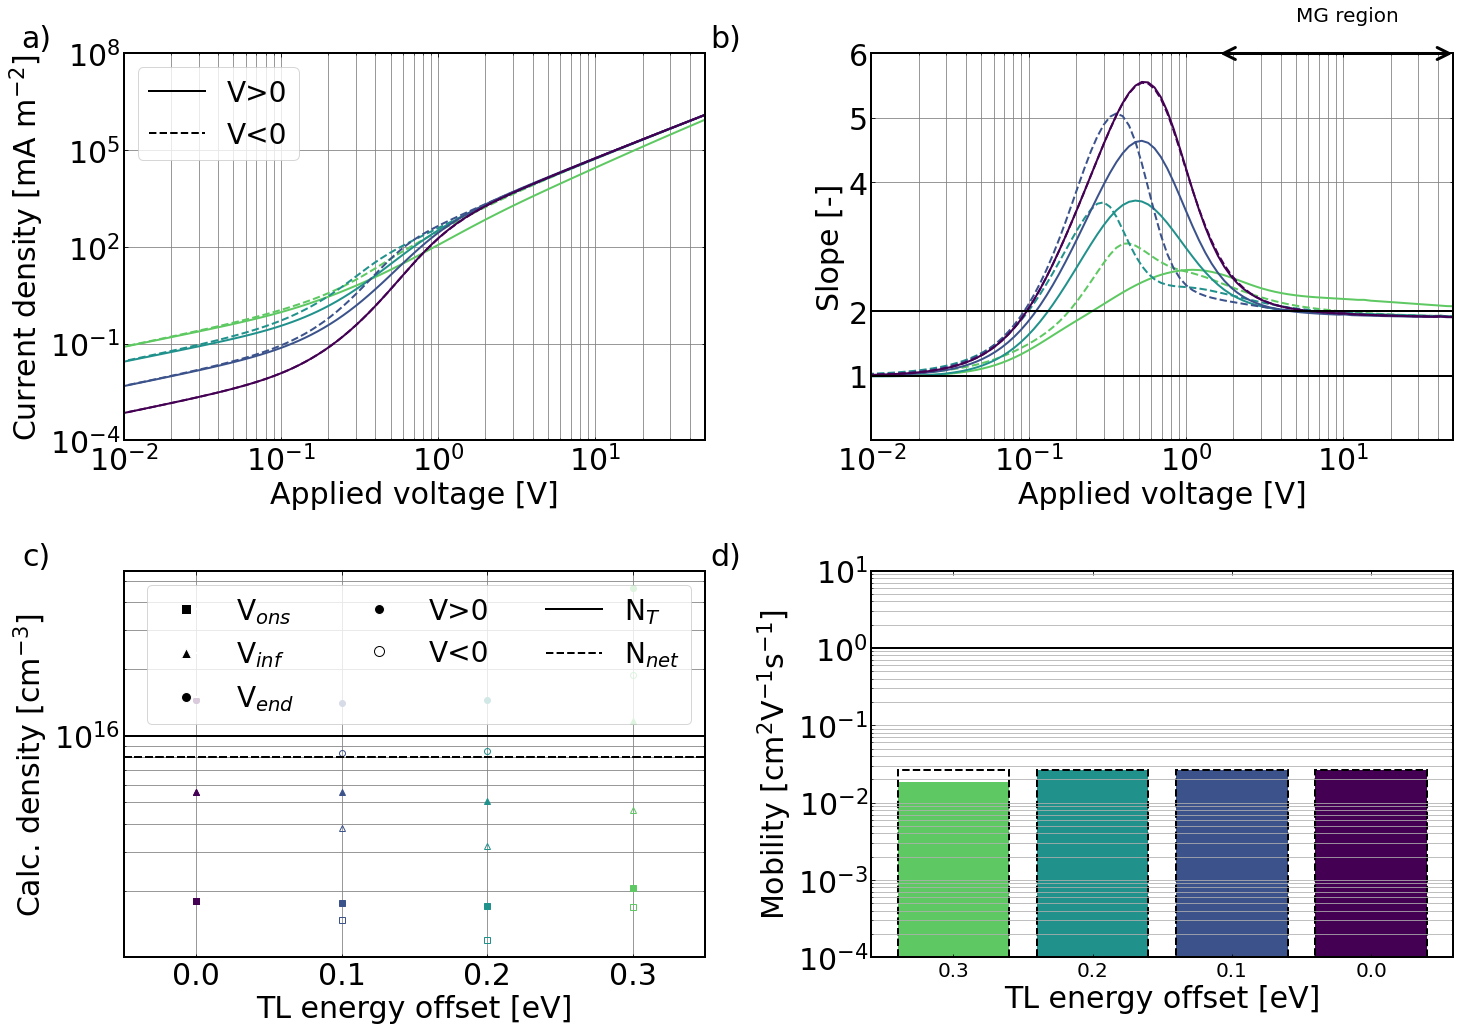

In [6]:
to_plot = [3.9,3.8,3.7,3.6]
nrj_list = [3.6,3.7,3.8,3.9]
Nc_TL = 1e27
eps_TL = 5
mu_TL = 1e-7
L_pero = 500e-9 # m 
eps_r_pero = 24
traps_pero = 1e22
ions_pero = 2e21
timeout = str(9 * 60 ) # 9 minutes
# figsize = (int(21), int(12))
figsize = (int(21), int(16))
Vmax = 50
with_TL = True
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
str_save = 'excess'
Vscan = -1
NP = 550
tolPois = 1e-7
tolDens = 1e-6
couplePC = 10
minAcc = 1e-1
maxAcc = 1e-1
grad = 10
rerun = False
run_all_nrjs(nrj_list,eps_TL,Nc_TL,L_pero, eps_r_pero, ions_pero, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

# Vary mobility TL

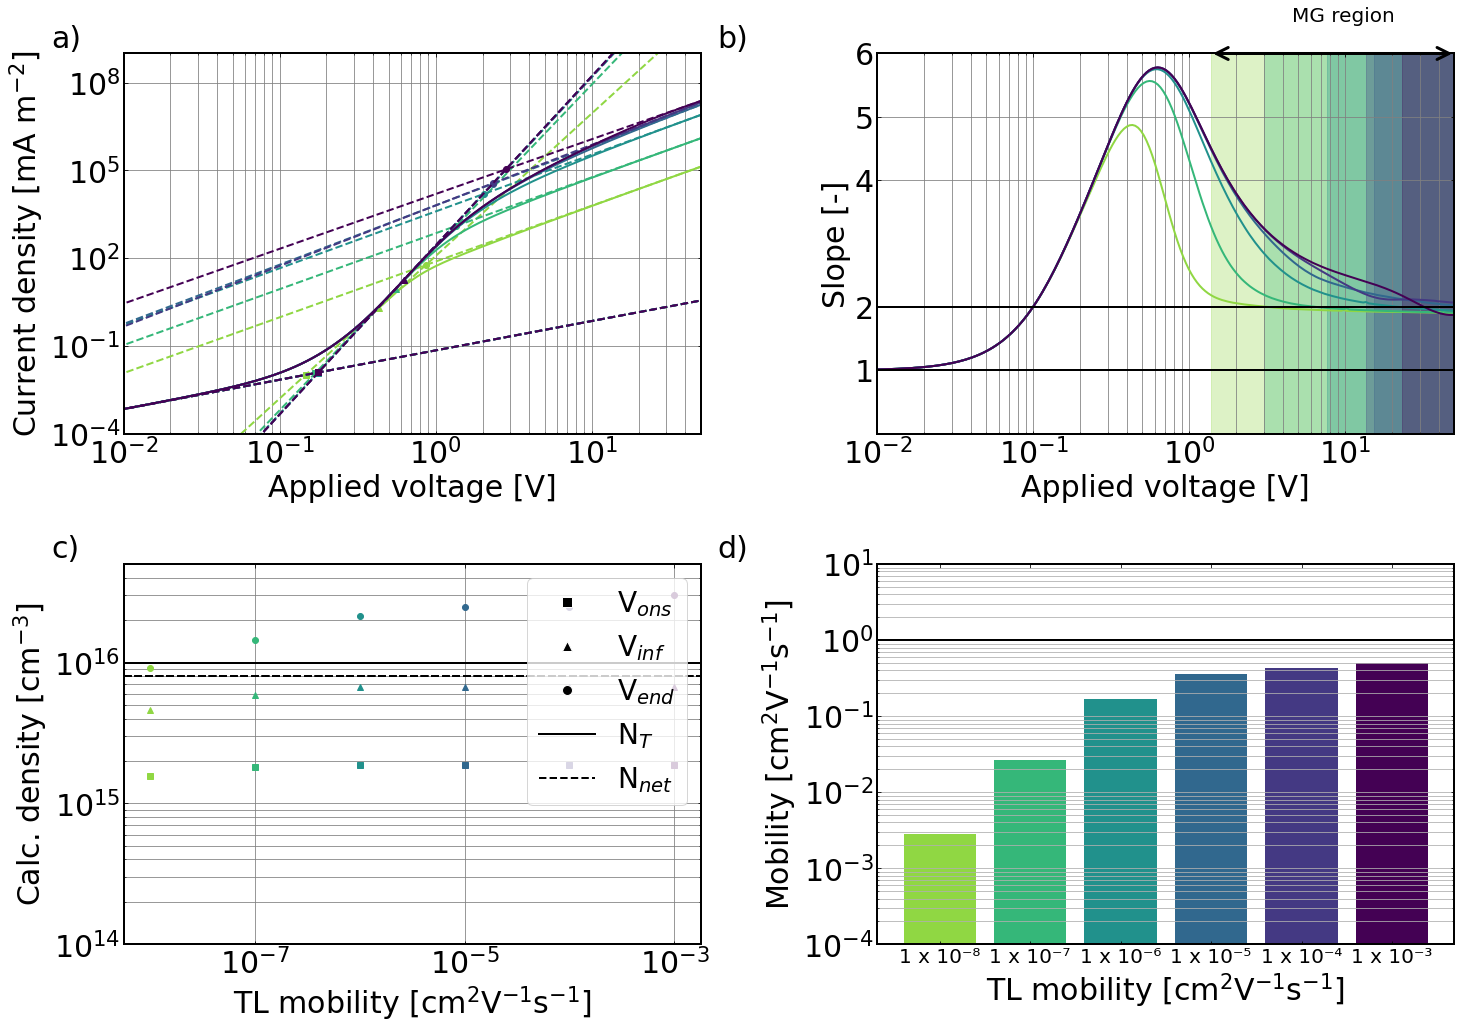

In [7]:
to_plot = [1e-8,1e-6,1e-4,1e-3]
mob_list = [1e-8,1e-7,1e-6,1e-5, 1e-4, 1e-3]
L_pero = 500e-9 # m 
eps_r_pero = 24
traps_pero = 1e22
ions_pero = 2e21
timeout = str(9 * 60 ) # 9 minutes
# figsize = (int(21), int(12))
figsize = (int(21), int(16))
Vmax = 50
with_TL = True
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
str_save = ''
Vscan = -1
NP = 550
tolPois = 1e-7
tolDens = 1e-6
couplePC = 10
minAcc = 1e-1
maxAcc = 1e-1
grad = 10
rerun = False
run_all_mobs(mob_list,L_pero, eps_r_pero, ions_pero, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

# Vary doping

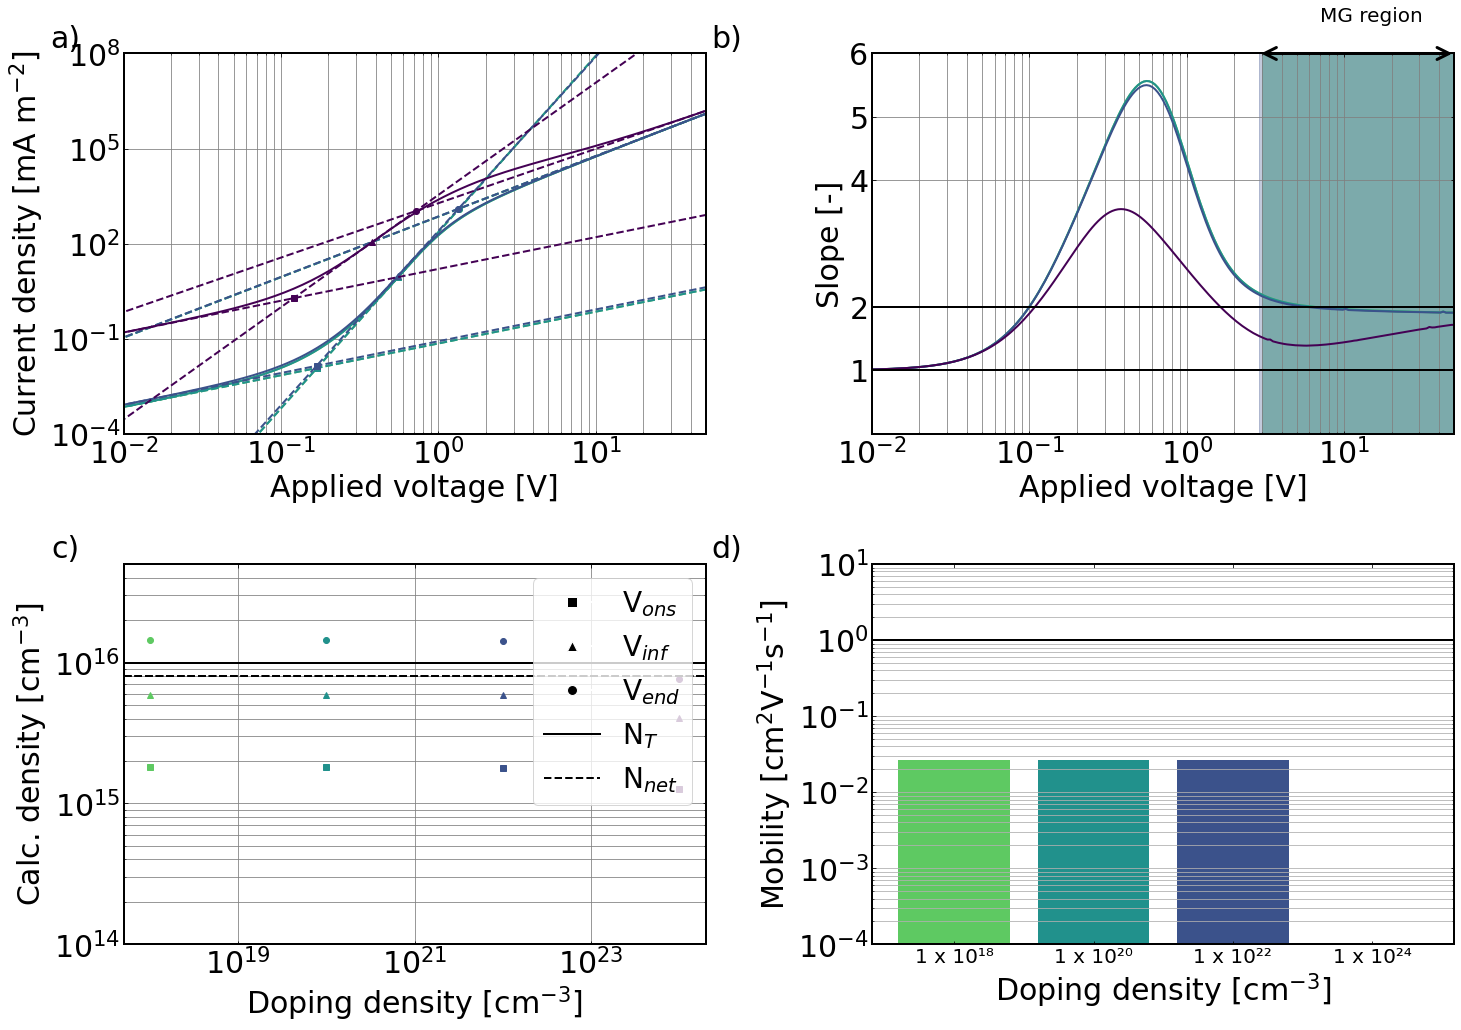

In [8]:
to_plot = [1e18,1e20,1e22,1e24]
dop_list = [1e18,1e20,1e22,1e24]
L_pero = 500e-9 # m 
eps_r_pero = 24
traps_pero = 1e22
ions_pero = 2e21
Vmax = 50
with_TL = True
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
str_save = ''
Vscan = -1
NP = 550
tolPois = 1e-7
tolDens = 1e-6
couplePC = 10
minAcc = 1e-1
maxAcc = 1e-1
grad = 10
rerun = False
run_all_dops(dop_list,L_pero, eps_r_pero, ions_pero, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)

# Hysteresis

In [9]:
Vmax = 5
Vmin = 0
traps_pero = 1e22
ions_pero = 2e21

In [10]:
# run the steady state simulation with ions free and ions fixed

cwd = os.getcwd()
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
session_path_simss = os.path.join(cwd, 'SIMsalabim','SimSS')
# ./simss simulation_setup_sclc_tl.txt -Vscan -1 -fixIons 1 -preCond 1 -Vpre 10 -Vmax 9.5 -minAcc 0.2 -maxAcc 0.2 -failureMode 1 -NJV 100 -NP 550 -grad 4 -Vdist 1 -Vstep 1e-3 -Vmin 0
cmd_pars = [{'par': 'l2.L', 'val': '500e-9'},{'par': 'l2.C_p_bulk', 'val': '0'},{'par':'NP','val':'550'},{'par':'grad','val':'4'},{'par':'tolPois','val':'1e-7'},{'par':'couplePC','val':'10'},{'par':'l2.N_t_bulk','val':str(traps_pero)},{'par':'l2.N_anion','val':str(ions_pero)},{'par':'l2.N_cation','val':str(ions_pero)},{'par':'failureMode','val':'2'},{'par':'tolDens','val':'1e-7'},{'par':'timeout','val':str(timeout)},{'par':'minAcc','val':'1e-1'},{'par':'maxAcc','val':'1e-1'}, {'par':'Vscan','val':'-1'},{'par':'fixIons','val':'1'},{'par':'preCond','val':'1'},{'par':'Vpre','val':str(Vmax)},{'par':'Vmax','val':str(Vmax-0.5)},{'par':'Vdist','val':'1'},{'par':'Vstep','val':'1e-2'},{'par':'Vmin','val':'0'}]
G_fracs = None
JV_file_name = os.path.join(session_path_simss,'JV_fix_rev.dat')

rerun = False
if rerun:
    res = run_SS_JV(simss_device_parameters,session_path_simss,JV_file_name,G_fracs,parallel=False,force_multithreading=False,cmd_pars=cmd_pars)



In [11]:
# run the steady state simulation with ions free and ions fixed
cwd = os.getcwd()
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
session_path_simss = os.path.join(cwd, 'SIMsalabim','SimSS')
# ./simss simulation_setup_sclc_tl.txt -Vscan -1 -fixIons 1 -preCond 1 -Vpre 10 -Vmax 9.5 -minAcc 0.2 -maxAcc 0.2 -failureMode 1 -NJV 100 -NP 550 -grad 4 -Vdist 1 -Vstep 1e-3 -Vmin 0
cmd_pars = [{'par': 'l2.L', 'val': '500e-9'},{'par': 'l2.C_p_bulk', 'val': '0'},{'par':'NP','val':'550'},{'par':'grad','val':'4'},{'par':'tolPois','val':'1e-7'},{'par':'couplePC','val':'10'},{'par':'l2.N_t_bulk','val':str(traps_pero)},{'par':'l2.N_anion','val':str(ions_pero)},{'par':'l2.N_cation','val':str(ions_pero)},{'par':'failureMode','val':'2'},{'par':'tolDens','val':'1e-7'},{'par':'timeout','val':str(timeout)},{'par':'minAcc','val':'1e-1'},{'par':'maxAcc','val':'1e-1'}, {'par':'Vscan','val':'1'},{'par':'fixIons','val':'1'},{'par':'preCond','val':'1'},{'par':'Vpre','val':str(0)},{'par':'Vmax','val':str(Vmax)},{'par':'Vdist','val':'1'},{'par':'Vstep','val':'1e-2'},{'par':'Vmin','val':'1e-2'}]
G_fracs = None
JV_file_name = os.path.join(session_path_simss,'JV_fix_for.dat')

rerun = False
if rerun:
    res = run_SS_JV(simss_device_parameters,session_path_simss,JV_file_name,G_fracs,parallel=False,force_multithreading=False,cmd_pars=cmd_pars)



In [12]:
# run the steady state simulation with ions free and ions fixed
cwd = os.getcwd()
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
session_path_simss = os.path.join(cwd, 'SIMsalabim','SimSS')
# ./simss simulation_setup_sclc_tl.txt -Vscan -1 -fixIons 1 -preCond 1 -Vpre 10 -Vmax 9.5 -minAcc 0.2 -maxAcc 0.2 -failureMode 1 -NJV 100 -NP 550 -grad 4 -Vdist 1 -Vstep 1e-3 -Vmin 0
cmd_pars = [{'par': 'l2.L', 'val': '500e-9'},{'par': 'l2.C_p_bulk', 'val': '0'},{'par':'NP','val':'550'},{'par':'grad','val':'4'},{'par':'tolPois','val':'1e-7'},{'par':'couplePC','val':'10'},{'par':'l2.N_t_bulk','val':str(traps_pero)},{'par':'l2.N_anion','val':str(ions_pero)},{'par':'l2.N_cation','val':str(ions_pero)},{'par':'failureMode','val':'2'},{'par':'tolDens','val':'1e-7'},{'par':'timeout','val':str(timeout)},{'par':'minAcc','val':'1e-1'},{'par':'maxAcc','val':'1e-1'}, {'par':'Vscan','val':'-1'},{'par':'fixIons','val':'0'},{'par':'preCond','val':'0'},{'par':'Vpre','val':str(Vmax)},{'par':'Vmax','val':str(Vmax)},{'par':'Vdist','val':'1'},{'par':'Vstep','val':'1e-2'},{'par':'Vmin','val':'0'}]
G_fracs = None
JV_file_name = os.path.join(session_path_simss,'JV_free.dat')

rerun = False
if rerun:
    res = run_SS_JV(simss_device_parameters,session_path_simss,JV_file_name,G_fracs,parallel=False,force_multithreading=False,cmd_pars=cmd_pars)



In [13]:

def run_hyst(scan_speed,ID):
    cwd = os.getcwd()
    zimt_device_parameters = os.path.join(cwd, 'SIMsalabim','ZimT','simulation_setup_sclc_tl.txt')
    session_path = os.path.join(cwd, 'SIMsalabim','ZimT')

    cmd_pars = [{'par': 'l2.L', 'val': '500e-9'},{'par': 'l2.C_p_bulk', 'val': '0'},{'par':'NP','val':'550'},{'par':'grad','val':'4'},{'par':'tolPois','val':'1e-7'},{'par':'couplePC','val':'10'},{'par':'l2.N_t_bulk','val':str(traps_pero)},{'par':'l2.N_anion','val':str(ions_pero)},{'par':'l2.N_cation','val':str(ions_pero)},{'par':'failureMode','val':'2'},{'par':'tolDens','val':'1e-7'},{'par':'timeout','val':'-1'},{'par':'minAcc','val':'1e-1'},{'par':'maxAcc','val':'1e-1'}]
    direction = -1
    G_frac = 0
    tVG_name = os.path.join(session_path,'tVG.txt')
    steps = 200

    Hysteresis_JV(zimt_device_parameters, session_path, 0, scan_speed, direction, G_frac, tVG_name, run_mode=False, Vmin=Vmin, Vmax=Vmax, steps = steps, expJV_Vmin_Vmax='', expJV_Vmax_Vmin='',rms_mode='lin',threadsafe=False,expo_mode = True, Vminexpo = 5e-3, UUID=ID, cmd_pars=cmd_pars)
    

cwd = os.getcwd()
zimt_device_parameters = os.path.join(cwd, 'SIMsalabim','ZimT','simulation_setup_sclc_tl.txt')
session_path = os.path.join(cwd, 'SIMsalabim','ZimT')


scan_speeds = np.logspace(-3,3,7)
ID_list = [str(uuid.uuid4()) for i in range(len(scan_speeds))]

rerun = False
if rerun:
    df_rev_for = pd.DataFrame({'ID':ID_list,'scan_speed':scan_speeds})
    Parallel(n_jobs=min(len(scan_speeds),10))(delayed(run_hyst)(scan_speed,ID) for scan_speed,ID in zip(scan_speeds,ID_list))


    df_rev_for.to_csv(os.path.join(session_path,'rev_for_scan_speeds.csv'),index=False)


In [14]:
def run_hyst(scan_speed,ID):
    cwd = os.getcwd()
    zimt_device_parameters = os.path.join(cwd, 'SIMsalabim','ZimT','simulation_setup_sclc_tl.txt')
    session_path = os.path.join(cwd, 'SIMsalabim','ZimT')

    cmd_pars = [{'par': 'l2.L', 'val': '500e-9'},{'par': 'l2.C_p_bulk', 'val': '0'},{'par':'NP','val':'550'},{'par':'grad','val':'4'},{'par':'tolPois','val':'1e-7'},{'par':'couplePC','val':'10'},{'par':'l2.N_t_bulk','val':str(traps_pero)},{'par':'l2.N_anion','val':str(ions_pero)},{'par':'l2.N_cation','val':str(ions_pero)},{'par':'failureMode','val':'2'},{'par':'tolDens','val':'1e-7'},{'par':'timeout','val':'-1'},{'par':'minAcc','val':'1e-1'},{'par':'maxAcc','val':'1e-1'}]
    direction = 1
    G_frac = 0
    tVG_name = os.path.join(session_path,'tVG.txt')
    steps = 200

    Hysteresis_JV(zimt_device_parameters, session_path, 0, scan_speed, direction, G_frac, tVG_name, run_mode=False, Vmin=Vmin, Vmax=Vmax, steps = steps, expJV_Vmin_Vmax='', expJV_Vmax_Vmin='',rms_mode='lin',threadsafe=False,expo_mode = True, Vminexpo = 5e-3, UUID=ID, cmd_pars=cmd_pars)
    

cwd = os.getcwd()
zimt_device_parameters = os.path.join(cwd, 'SIMsalabim','ZimT','simulation_setup_sclc_tl.txt')
session_path = os.path.join(cwd, 'SIMsalabim','ZimT')


scan_speeds = np.logspace(-3,3,7)
ID_list = [str(uuid.uuid4()) for i in range(len(scan_speeds))]



rerun = False
if rerun:
    df_for_rev = pd.DataFrame({'ID':ID_list,'scan_speed':scan_speeds})    
    Parallel(n_jobs=min(len(scan_speeds),10))(delayed(run_hyst)(scan_speed,ID) for scan_speed,ID in zip(scan_speeds,ID_list))


    df_for_rev.to_csv(os.path.join(session_path,'for_rev_scan_speeds.csv'),index=False)


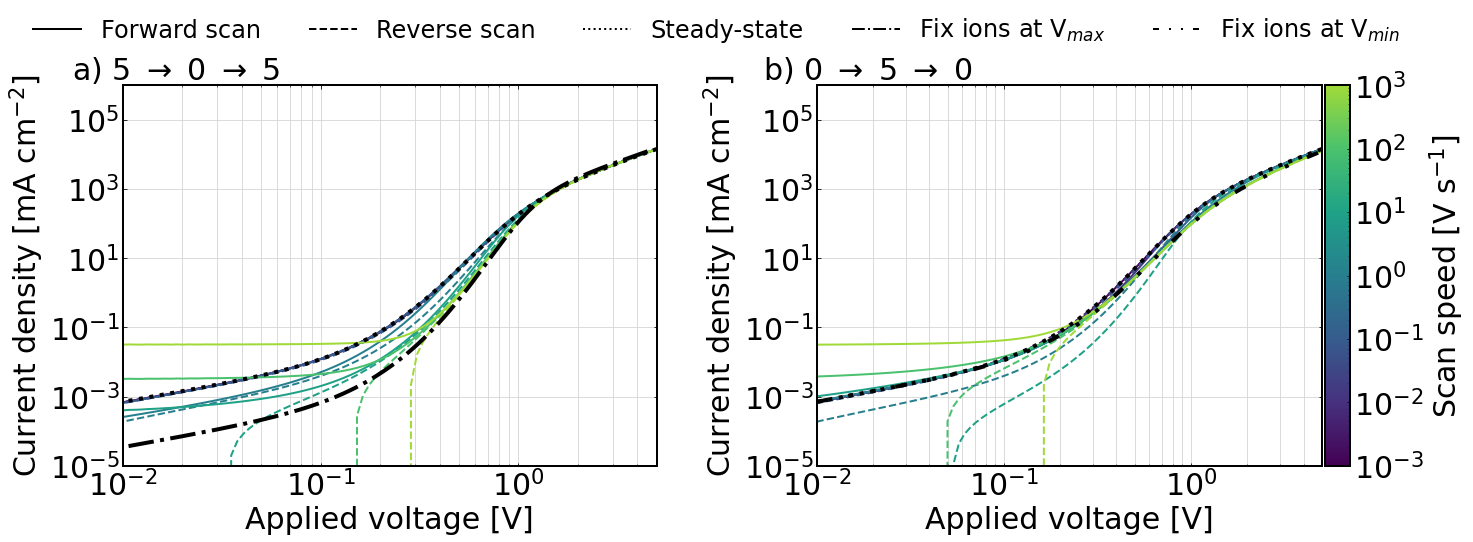

In [15]:
session_path_simss = os.path.join(cwd, 'SIMsalabim','SimSS')
session_path = os.path.join(cwd, 'SIMsalabim','ZimT')
res_dir = os.path.join(cwd, 'results')

fig = plt.figure(figsize=(22,7))
gs = fig.add_gridspec(1, 2, wspace=0.3)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# ax1,ax2 = plt.subplot(121),plt.subplot(122)
colors = plt.cm.viridis(np.linspace(0,1,len(scan_speeds)+1))

i = 0
df_rev_for = pd.read_csv(os.path.join(session_path,'rev_for_scan_speeds.csv'))
for ID,speed in df_rev_for.values:

    data_tj = pd.read_csv(os.path.join(session_path,'tj_'+str(ID)+'.dat'), sep=r'\s+')
    # find index 0 V
    idx = data_tj[data_tj['Vext']==0].index[0]
    
    # make 2 dataframe for each scan direction
    data_tj1 = data_tj.iloc[:idx]
    data_tj2 = data_tj.iloc[idx:]
    # print(data_tj1)
    ax1.plot(data_tj1['Vext'],data_tj1['Jext']/10,label=str(speed),color=colors[i],linestyle='--')
    ax1.plot(data_tj2['Vext'],data_tj2['Jext']/10,label=str(speed),color=colors[i],linestyle='-')
    i += 1

df_fix = pd.read_csv(os.path.join(session_path_simss,'JV_fix_rev.dat'),sep=r'\s+')
df_fix = df_fix[df_fix['Vext']>0]
df_fix = df_fix[df_fix['Jext']>0]   
ax1.plot(df_fix['Vext'],df_fix['Jext']/10,label='fix',color='black',linestyle='-.',linewidth=4)

df_free = pd.read_csv(os.path.join(session_path_simss,'JV_free.dat'),sep=r'\s+')
df_free = df_free[df_free['Vext']>0]
df_free = df_free[df_free['Jext']>0]
ax1.plot(df_free['Vext'],df_free['Jext']/10,label='free',color='black',linestyle=':',linewidth=4)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim([1e-2,Vmax])
ax1.set_ylim([1e-5,1e6])
ax1.grid(True,which='both',axis='both',color='lightgray', linestyle='-')
ax1.set_xlabel('Applied voltage [V]')
ax1.set_ylabel('Current density [mA cm$^{-2}$]')


i = 0
df_for_rev = pd.read_csv(os.path.join(session_path,'for_rev_scan_speeds.csv'))
for ID,speed in df_for_rev.values:
    data_tj = pd.read_csv(os.path.join(session_path,'tj_'+str(ID)+'.dat'), sep=r'\s+')
    # find index 0 V
    idx = data_tj[data_tj['Vext']==Vmax].index[0]
    
    # make 2 dataframe for each scan direction
    data_tj1 = data_tj.iloc[:idx]
    data_tj2 = data_tj.iloc[idx:]
    # print(data_tj1)
    ax2.plot(data_tj1['Vext'],data_tj1['Jext']/10,label=str(speed),color=colors[i],linestyle='-')
    ax2.plot(data_tj2['Vext'],data_tj2['Jext']/10,label=str(speed),color=colors[i],linestyle='--')
    i += 1

df_free = pd.read_csv(os.path.join(session_path_simss,'JV_free.dat'),sep=r'\s+')
# df_free = df_free[df_free['Vext']>0]
# df_free = df_free[df_free['Jext']>0]
ax2.plot(df_free['Vext'],df_free['Jext']/10,label='free',color='black',linestyle=':',linewidth=4)

df_fix_for = pd.read_csv(os.path.join(session_path_simss,'JV_fix_for.dat'),sep=r'\s+')
# df_fix_for = df_fix_for[df_fix_for['Vext']>0]
# df_fix_for = df_fix_for[df_fix_for['Jext']>0]
ax2.plot(df_fix_for['Vext'],df_fix_for['Jext']/10,label='fix for',color='black',linestyle=(0, (3, 5, 1, 5, 1, 5)),linewidth=4)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim([1e-2,Vmax])
ax2.set_ylim([1e-5,1e6])
ax2.grid(True,which='both',axis='both',color='lightgray', linestyle='-')
ax2.set_xlabel('Applied voltage [V]')
ax2.set_ylabel('Current density [mA cm$^{-2}$]')

# add colorbar to plot for scan speeds log scale
custom_colors = plt.cm.viridis(np.linspace(0,1,len(scan_speeds)+1))
#remove the last color
custom_colors = custom_colors[:-1]
# make colorbar

from matplotlib.colors import LinearSegmentedColormap, LogNorm
# Create a custom colormap from the array of colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=LogNorm(vmin=1e-3, vmax=1e3))
sm.set_array([])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider1 = make_axes_locatable(ax2)
cax2= divider1.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(sm, cax=cax2)
cbar2.set_label('Scan speed [V s$^{-1}$]')

#custom legend 
legend_elements = [Line2D([0], [0], linestyle='-', color='black', label='Forward scan',linewidth=2),
                    Line2D([0], [0], linestyle='--', color='black', label='Reverse scan',linewidth=2),
                    Line2D([0], [0], linestyle=':', color='black', label='Steady-state',linewidth=2),
                    Line2D([0], [0], linestyle='-.', color='black', label='Fix ions at V$_{max}$',linewidth=2),
                    Line2D([0], [0], linestyle=(0, (3, 5, 1, 5, 1, 5)), color='black', label='Fix ions at V$_{min}$',linewidth=2)]

# add legend horizontally on top of the plot not the axis
fig.legend(handles=legend_elements, loc='lower center',ncol=5,fontsize=24,frameon=False, bbox_to_anchor=(0.5, 0.92))

# figure title for each axis

ax1.set_title('a) 5 $\\rightarrow$ 0 $\\rightarrow$ 5',position=(0.1,1))
ax2.set_title('b) 0 $\\rightarrow$ 5 $\\rightarrow$ 0',position=(0.1,1))
plt.tight_layout()

plt.savefig(os.path.join(res_dir,'hysteresis.pdf'),dpi=300, format="pdf", bbox_inches="tight")


# Figure 2

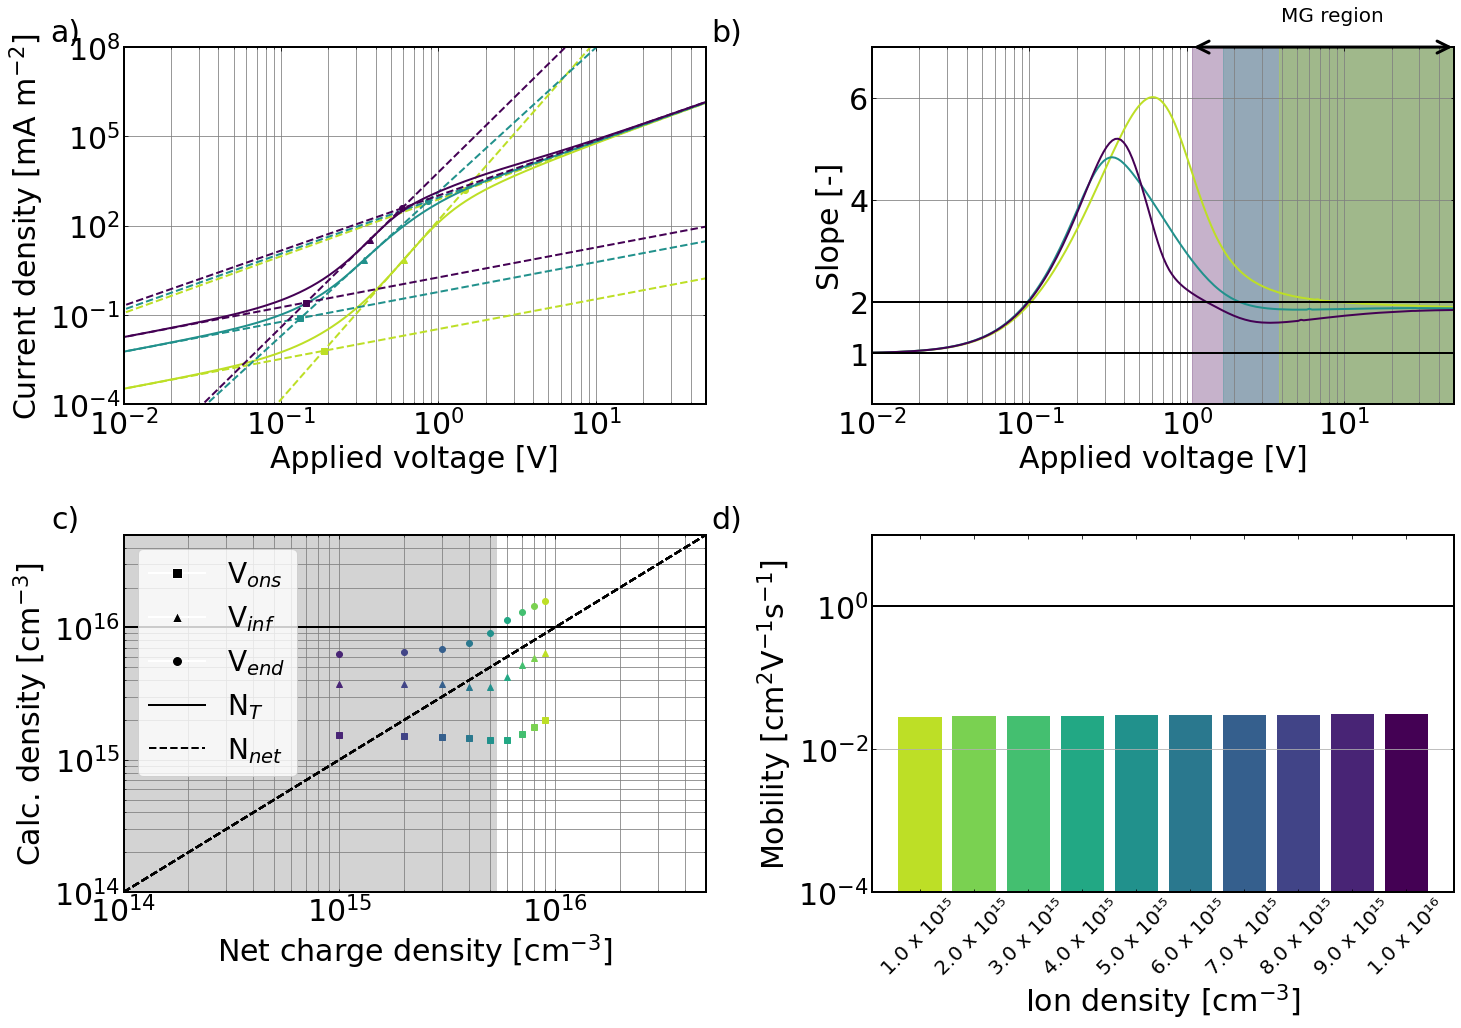

In [16]:
L_pero = 500e-9 # m 500e-9, 800e-9, 1000e-9
eps_r_pero = 24
traps_pero = 1e22
ions_bulk_list = np.linspace(1e21,1e22,10)
if L_pero == 1000e-9:
    Vmax = 100
else:
    Vmax = 50

with_TL = True
simss_device_parameters = os.path.join(cwd, 'SIMsalabim','SimSS','simulation_setup_sclc_tl.txt')
str_save = 'ions_tl'
Vscan = 1
NP = 550
tolPois = 1e-7
tolDens = 1e-6
couplePC = 10
minAcc = 1e-1
maxAcc = 1e-1
grad = 4
rerun = False
run_all_ions(L_pero, eps_r_pero, ions_bulk_list, traps_pero, Vmax, Vscan, NP, tolPois, tolDens, couplePC, minAcc, maxAcc, grad, simss_device_parameters, str_save, with_TL, rerun)


# Figure 3

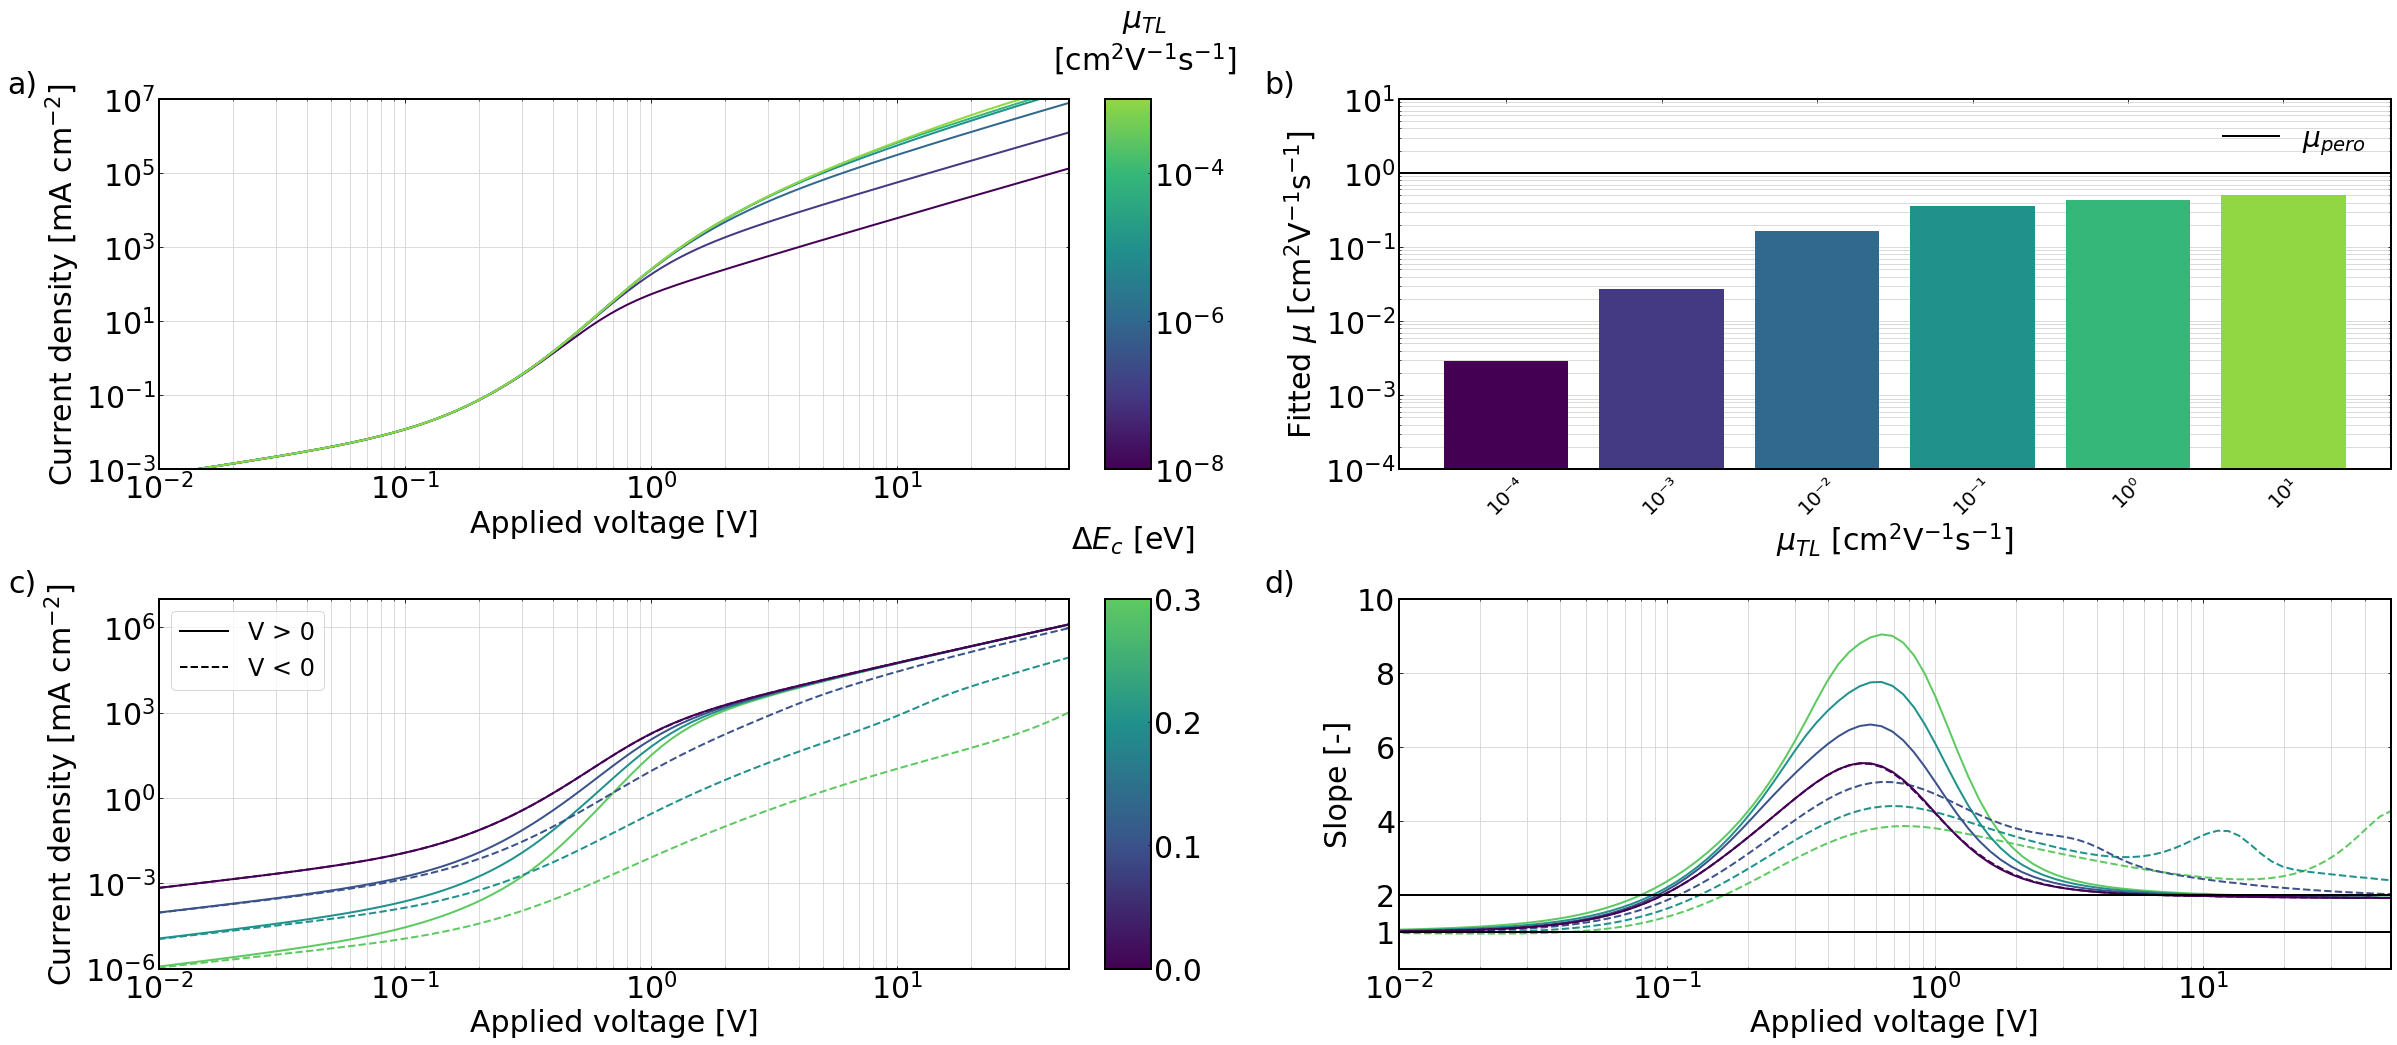

In [17]:
cwd = os.getcwd()
res_dir = os.path.join(cwd, 'results')
# data with TL ions mobility
L_pero = 500e-9
eps_r_pero = 24
traps_pero = 1e22
ions = 2e21
Vscan = -1
mu = []
df_mob = pd.read_csv(os.path.join(res_dir,'500.0_mob_TL_list.csv'))
fig3 = plt.figure(figsize=(40,16))
gs = fig3.add_gridspec(2, 2, wspace=0.25, hspace=0.35)
ax1 = fig3.add_subplot(gs[0, 0])
ax2 = fig3.add_subplot(gs[0, 1])
ax3 = fig3.add_subplot(gs[1, 0])
ax4 = fig3.add_subplot(gs[1, 1])
idx = 0
colors = plt.cm.viridis(np.linspace(0,1,len(df_mob)+1))
for ID, mob_TL in df_mob.values:
    JV_file_name = os.path.join('SIMsalabim','SimSS',f'JV_{ID}.dat')
    data_JV = pd.read_csv(JV_file_name,sep=r'\s+')
    data_JV = data_JV[data_JV['Vext']>0]
    data_JV = data_JV[data_JV['Jext']>0]
    V_slopef,J_slopef,slopesf,get_tangentf,idx_maxf,max_slopesf,tang_val_V1f,tang_val_V2f,tang_val_V3f,V1f,J1f,V2f,J2f,Vinf,Jinf = SCLC_get_data_plot(data_JV['Vext'],data_JV['Jext'])
    JV_file_name = os.path.join('SIMsalabim','SimSS',f'JV_{ID}.dat')
    data_JV = pd.read_csv(JV_file_name,sep=r'\s+')
    label = ''
    
    data_JV = data_JV[data_JV['Vext']>0]
    data_JV = data_JV[data_JV['Jext']>0]
    # minJ = min(minJ,data_JV['Jext'].min())
    # maxJ = max(maxJ,data_JV['Jext'].max())
    if Vscan == -1:
        # reverse the data
        data_JV = data_JV.iloc[::-1]

    V_slopef,J_slopef,slopesf,get_tangentf,idx_maxf,max_slopesf,tang_val_V1f,tang_val_V2f,tang_val_V3f,V1f,J1f,V2f,J2f,Vinf,Jinf = SCLC_get_data_plot(data_JV['Vext'],data_JV['Jext'])


    ## Calc Voltages
    Vnet = calc_Vnet_with_ions(ions,traps_pero,L_pero,eps_r_pero)
    Vtfl = calc_Vtfl(traps_pero,L_pero,eps_r_pero)
    Vsat = calc_Vsat(L_pero,5e24,0,eps_r_pero,295)
    Ntmin = calc_nt_min(L_pero,eps_r_pero,295)
    Vmin = calc_Vtfl(Ntmin,L_pero,eps_r_pero)

    # get mobility
    data_JV_mott = copy.deepcopy(data_JV)
    
    if Vsat > Vtfl:
        data_JV_mott['slopesf'] = slopesf
        data_JV_mott = data_JV_mott[data_JV_mott['Vext']>=1]
        data_JV_mott = data_JV_mott[data_JV_mott['Vext']<=Vsat]
        data_JV_mott = data_JV_mott[data_JV_mott['Vext']>=Vnet]
        data_JV_mott = data_JV_mott[data_JV_mott['slopesf']<=2.2]
        data_JV_mott = data_JV_mott[data_JV_mott['slopesf']>=1.8]
        if len(data_JV_mott) <= 5:
            mu.append(0)
        else:
            VminMG = min(data_JV_mott['Vext'])
            VmaxMG = max(data_JV_mott['Vext'])
            Mott_Gurney_fit = fit_MottGurney(data_JV_mott['Vext'],data_JV_mott['Jext'],1e-4,eps_r_pero,0,L_pero,var2fit=['mu'])
            mu.append(Mott_Gurney_fit[0])
        # print('Mott_Gurney_fit:',Mott_Gurney_fit)
    else:
        mu.append(0)

    ax1.plot(data_JV['Vext'],data_JV['Jext']/10,label=label,color=colors[idx])
    # ax1.axvspan(VminMG, VmaxMG, color=colors[idx], alpha=0.2)
    idx += 1
ax1.set_yscale('log')
ax1.set_ylim([1e-3,1e7])
ax1.set_ylabel('Current density [mA cm$^{-2}$]')
ax1.set_xscale('log')
ax1.set_xlim([1e-2,Vmax])
ax1.set_xlabel('Applied voltage [V]')
ax1.grid(True,which='both',axis='both',color='lightgray', linestyle='-')


ticks = []
for i in df_mob['mob_TL']:
    ticks.append(sci_notation(i*1e4, sig_fig=-1))
    # ticks.append(sci_notation(i*1e4, sig_fig=-1))

ax2.bar(np.arange(len(mu)),np.asarray(mu)*1e4,color=colors)
ax2.axhline(1,linestyle='-',color='k',label='$\mu_{pero}$')
ax2.set_axisbelow(True)
ax2.grid(b=True,which='both',axis='y', color='lightgray', linestyle='-',zorder=0)
ax2.legend(frameon=False)
ax2.set_xticks(np.arange(len(mu)), ticks,fontsize=20,rotation=45)
ax2.set_ylabel('Fitted $\mu$ [cm$^{2}$V$^{-1}$s$^{-1}$]')
ax2.set_xlabel('$\mu_{TL}$ [cm$^{2}$V$^{-1}$s$^{-1}$]')
ax2.set_yscale('log')
ax2.set_ylim([1e-4 , 10])



df_nrj = pd.read_csv(os.path.join(res_dir,'500.0_nrj_TL_list.csv'))
idx = 0
colors = plt.cm.viridis(np.linspace(0,1,len(df_nrj)+1))

nrj_TL_list = df_nrj['nrj_TL'].values
ID_list = df_nrj['ID'].values

nons_list,ninf_list,nend_list,mu  = [],[],[],[]

# plot the results
colors = plt.cm.viridis(np.linspace(0,1,len(nrj_TL_list)+1))
# remove the last color
colors = colors[:-1]
#invert colors
colors = colors[::-1]

# ax = plt.gca()
minJ,maxJ = 1e20,1e-20
VminMG,VmaxMG = 1e3,0
slopemax = 0
idx = -2*len(nrj_TL_list)
minVminMG,maxVmaxMG = 1e3,0
for i,ep in enumerate(nrj_TL_list):
    ID = ID_list[i]
    JV_file_name = os.path.join('SIMsalabim','SimSS',f'JV_{ID}.dat')
    data_JV_main = pd.read_csv(JV_file_name,sep=r'\s+')
    label = ''
    
    for sign_V in [-1,1]:
        data_JV = copy.deepcopy(data_JV_main)
        data_JV['Vext'] = data_JV['Vext']*sign_V
        data_JV['Jext'] = data_JV['Jext']*sign_V
        data_JV = data_JV[data_JV['Vext']>0]
        data_JV = data_JV[data_JV['Jext']>0]
        minJ = min(minJ,data_JV['Jext'].min())
        maxJ = max(maxJ,data_JV['Jext'].max())
        if sign_V == -1:
            # reverse the data
            data_JV = data_JV.iloc[::-1]

        V_slopef,J_slopef,slopesf,get_tangentf,idx_maxf,max_slopesf,tang_val_V1f,tang_val_V2f,tang_val_V3f,V1f,J1f,V2f,J2f,Vinf,Jinf = SCLC_get_data_plot(data_JV['Vext'],data_JV['Jext'])

        # print(max_slopesf)
        if max_slopesf > 2:
            nons_list.append(calc_net_charge(V1f,L_pero,eps_r_pero)/1e6)
            ninf_list.append(calc_net_charge(Vinf,L_pero,eps_r_pero)/1e6)
            nend_list.append(calc_net_charge(V2f,L_pero,eps_r_pero)/1e6)
        else:
            nons_list.append(np.nan)
            ninf_list.append(np.nan)
            nend_list.append(np.nan)

        ## Calc Voltages
        Vnet = calc_Vnet_with_ions(ions,traps_pero,L_pero,eps_r_pero)
        Vtfl = calc_Vtfl(traps_pero,L_pero,eps_r_pero)
        Vsat = calc_Vsat(L_pero,5e24,0,eps_r_pero,295)
        Ntmin = calc_nt_min(L_pero,eps_r_pero,295)
        Vmin = calc_Vtfl(Ntmin,L_pero,eps_r_pero)

        

        # remove Vext = 0 from data_JV
        # if nrj_TL_list[i] in to_plot:
        data_JV = data_JV[data_JV['Vext']!=0]
        if sign_V == -1:
            linestyle = '--'
        else:
            linestyle = '-'
        ax3.plot(data_JV['Vext'],data_JV['Jext']/10,label=label,color=colors[i],linestyle=linestyle)
        # marker fill color if sign_V == 1: else no color
        if sign_V == 1:
            markerfacecolor = colors[i]
        else:
            markerfacecolor = 'None'


        if max_slopesf > 2:
            slopemax = max(slopemax,max(slopesf))

        minVminMG = min(minVminMG,VminMG)
        maxVmaxMG = max(maxVmaxMG,VmaxMG)
        ax4.plot(V_slopef,slopesf,label=label,color=colors[i],linestyle=linestyle)
        # if len(data_JV_mott) >= 5:
        #     ax2.axvspan(VminMG, VmaxMG, color=colors[i], alpha=0.5,zorder=idx)
        idx += 1


ax3.set_yscale('log')
ax3.set_ylim([1e-6,1e7])
ax3.set_ylabel('Current density [mA cm$^{-2}$]')
ax3.set_xscale('log')
ax3.set_xlim([1e-2,Vmax])
ax3.set_xlabel('Applied voltage [V]')
ax3.grid(True,which='both',axis='both',color='lightgray', linestyle='-')

ax4.set_yscale('linear')
ax4.set_ylim([0,int(slopemax)+1])
ticks = ax4.get_yticks()
ticks = ticks[ticks>3]
ticks = np.append(ticks,[1,2])
ticks = np.unique(ticks)
ticks = np.sort(ticks)
ax4.set_yticks(ticks)
ax4.axhline(y=1, color='k', linestyle='-')
ax4.axhline(y=2, color='k', linestyle='-')
ax4.set_xscale('log')
ax4.set_xlabel('Applied voltage [V]')
ax4.set_ylabel('Slope [-]')
ax4.set_xlim([1e-2,Vmax])
ax4.set_ylim([0,int(slopemax)+1])
ax4.grid(True,which='both',axis='both',color='lightgray', linestyle='-')

# add colorbar to ax1
mob_TL_list = df_mob['mob_TL'].values
custom_colors = plt.cm.viridis(np.linspace(0,1,len(mob_TL_list)+1))
#remove the last color
custom_colors = custom_colors[:-1]

# Create a custom colormap from the array of colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=LogNorm(vmin=min(mob_TL_list), vmax=max(mob_TL_list)))
sm.set_array([])

divider1 = make_axes_locatable(ax1)
cax1= divider1.append_axes("right", size="5%", pad=0.50)
cbar1 = plt.colorbar(sm, cax=cax1)
cbar1.set_label('$\mu_{TL}$\n[cm$^{2}$V$^{-1}$s$^{-1}$]', rotation=0,y=1.25,labelpad=-80)

# add colorbar to ax3
custom_colors = plt.cm.viridis(np.linspace(0,1,len(nrj_TL_list)+1))
#remove the last color
custom_colors = custom_colors[:-1]
# reverse colors
# custom_colors = custom_colors[::-1]

nrj_TL_list = np.asarray(nrj_TL_list)
# Create a custom colormap from the array of colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
# Create a colorbar linear norm
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm = Normalize(vmin=min(nrj_TL_list-3.9), vmax=max(nrj_TL_list-3.9)))
sm.set_array([])
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider1 = make_axes_locatable(ax3)
cax3= divider1.append_axes("right", size="5%", pad=0.50)
cbar3 = plt.colorbar(sm, cax=cax3)
cbar3.set_label('$\Delta E_{c}$ [eV]', rotation=0,y=1.2,labelpad=-70)

# legend to ax3
legend_elements = [Line2D([0], [0], linestyle='-', color='black', label='V > 0', markersize=10),
                    Line2D([0], [0], linestyle='--', color='black', label='V < 0', markersize=10)]
ax3.legend(handles=legend_elements, loc='upper left',ncol=1,fontsize=24,frameon=True)

# add super title to axes
ax1.set_title('a)',position=(-0.15,0.97))
ax2.set_title('b)',position=(-0.12,0.97))
ax3.set_title('c)',position=(-0.15,0.97))
ax4.set_title('d)',position=(-0.12,0.97))

plt.tight_layout()

plt.savefig(os.path.join(res_dir,f'figure_3.pdf'),dpi=300, format="pdf", bbox_inches="tight")
